# Capstone 2 Los Angeles Metro Bikes

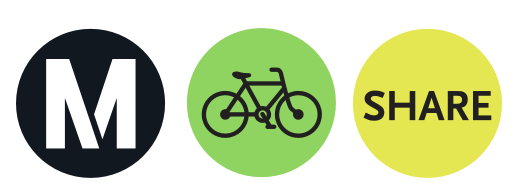

# Analyzing Trip And Usage Patterns
# Station Optimization
## Exploratory Data Analysis
By Oliver Bohler

It goes without saying that **LA Metro Bikes aims to avoid repeating the challenges faced in Pasadena**. This can also be said for cities that are panning to apply for the program. The following visual deep dive into the data can be used for cities to weigh if the seasonality or user behaviour would transfer well to their specific neighborhoods. A new bike share program was introduced in **North Hollywood in October 2021**, launching with **12 stations**, and remains active as of **2025**. However, when compared to the two major regions—**Downtown Los Angeles and the Westside**—**the data for North Hollywood is not substantial enough for meaningful machine learning insights and will be excluded at the beginning of the analysis**. However, at any point the data can be added to see how a small subset of stations has been performing in a less dense populated area.

From the previous data cleaning process, it has been demonstrated that the **Los Angeles Metro Bike program enjoys significant ridership throughout the Westside and Downtown Los Angeles regions**. These two regions **dominate in both trip volume and station usage**, making them the primary focus of this analysis.

Additionally, insights gained from this analysis can be compared to **previous and current promotional offers** to evaluate their impact on **trip volume and the purchase of different pass options**. Metro offers regular deals for new riders and monthly pass discounts which can contribute significantly to boost this program.

The insights can be shared with any of the following companies that have stakes in this program.

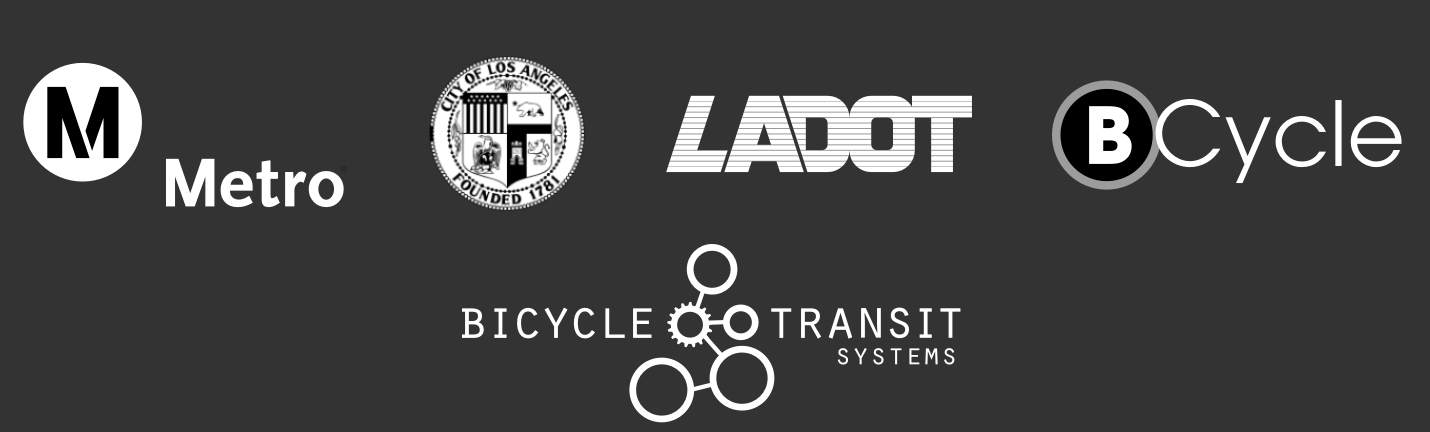

# The First Few Lines

After loading the data and neccessary libraries, dropping the North Hollywood data and ensuring that time and date columns are in the right data format, the stage is set to explore. The first step will be to get a more general overview of station and dock distribution per region and the usage patterns based on years, months and quarters. 

In [717]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx 
pd.options.display.max_columns = 400
pd.options.display.max_rows = 400
%matplotlib inline

stations = pd.read_csv('/Users/oliverbohler/Desktop/Springboard/RideShare/Code/rideshare_cleaned.csv')

stations = stations[
    ~((stations['start_station_region'] == 'North Hollywood') | (stations['end_station_region'] == 'North Hollywood'))
]

In [719]:
stations.head()

trip_id  year  month  day day_name  start_date    end_date  \
1  197703662  2022      7    1   Friday  2022-07-01  2022-07-01   
2  197704062  2022      7    1   Friday  2022-07-01  2022-07-01   
3  197704162  2022      7    1   Friday  2022-07-01  2022-07-01   
4  197708062  2022      7    1   Friday  2022-07-01  2022-07-01   
5  197708364  2022      7    1   Friday  2022-07-01  2022-07-01   

  start_time_new end_time_new  duration trip_route_category passholder_type  \
1       00:02:00     00:04:00         2             One Way    Monthly Pass   
2       00:19:00     00:22:00         3          Round Trip         Walk-up   
3       00:23:00     00:25:00         2          Round Trip         Walk-up   
4       00:26:00     01:05:00        39             One Way         Walk-up   
5       00:57:00     01:17:00        20             One Way     Annual Pass   

   bike_id bike_type  start_station     start_station_name  \
1    24302  electric           4406  Normandie & Hollywood   
2    19941  electric           3082        Traction & Rose   
3    17445  electric           3082        Traction & Rose   
4    19941  electric           3082        Traction & Rose   
5    13957  standard           4566        Venice & Hughes   

  start_station_region  start_lat   start_lon  end_station  \
1                 DTLA  34.101891 -118.300613         4442   
2                 DTLA  34.046520 -118.237411         3082   
3                 DTLA  34.046520 -118.237411         3082   
4                 DTLA  34.046520 -118.237411         3063   
5             Westside  34.023392 -118.399223         4562   

       end_station_name end_station_region    end_lat     end_lon  \
1    Normandie & Sunset               DTLA  34.098000 -118.300468   
2       Traction & Rose               DTLA  34.046520 -118.237411   
3       Traction & Rose               DTLA  34.046520 -118.237411   
4       Pershing Square               DTLA  34.048038 -118.253738   
5  Sepulveda & National           Westside  34.026970 -118.428207   

   num_of_docks  
1          14.0  
2          27.0  
3          27.0  
4          27.0  
5          15.0

In [721]:
print(stations['start_time_new'].head(10))
print(stations['start_time_new'].unique())

1     00:02:00
2     00:19:00
3     00:23:00
4     00:26:00
5     00:57:00
6     01:05:00
7     01:09:00
8     01:16:00
9     01:20:00
10    01:27:00
Name: start_time_new, dtype: object
['00:02:00' '00:19:00' '00:23:00' ... '04:12:00' '04:18:00' '05:44:00']


In [723]:
stations['start_date'] = pd.to_datetime(stations['start_date'], errors='coerce')
stations['end_date'] = pd.to_datetime(stations['end_date'], errors='coerce')
stations['start_time_new'] = pd.to_datetime(stations['start_time_new'], format='%H:%M:%S', errors='coerce').dt.time
stations['end_time_new'] = pd.to_datetime(stations['end_time_new'], format='%H:%M:%S', errors='coerce').dt.time
stations.dtypes

trip_id                          int64
year                             int64
month                            int64
day                              int64
day_name                        object
start_date              datetime64[ns]
end_date                datetime64[ns]
start_time_new                  object
end_time_new                    object
duration                         int64
trip_route_category             object
passholder_type                 object
bike_id                          int64
bike_type                       object
start_station                    int64
start_station_name              object
start_station_region            object
start_lat                      float64
start_lon                      float64
end_station                      int64
end_station_name                object
end_station_region              object
end_lat                        float64
end_lon                        float64
num_of_docks                   float64
dtype: object

In [724]:
print(stations['start_time_new'].head(10))
print(stations['start_time_new'].unique())

1     00:02:00
2     00:19:00
3     00:23:00
4     00:26:00
5     00:57:00
6     01:05:00
7     01:09:00
8     01:16:00
9     01:20:00
10    01:27:00
Name: start_time_new, dtype: object
[datetime.time(0, 2) datetime.time(0, 19) datetime.time(0, 23) ...
 datetime.time(4, 12) datetime.time(4, 18) datetime.time(5, 44)]


---
## An Overview of Regional Station Distribution

To understand the distribution of stations across the **Downtown LA** and **Westside** regions, a pie chart is used to visualize the proportion of stations in each area. The chart reveals that there are **146 stations in Downtown LA** and **65 stations in the Westside**.

At first glance, this may appear to be a **case of class imbalance**, as Downtown LA has significantly more stations than the Westside. However, throughout this analysis, multiple observations were made that **each region exhibits distinct usage patterns**. These differences suggest that **developing separate models for each region** could lead to more accurate insights and better optimization strategies later on. 

---

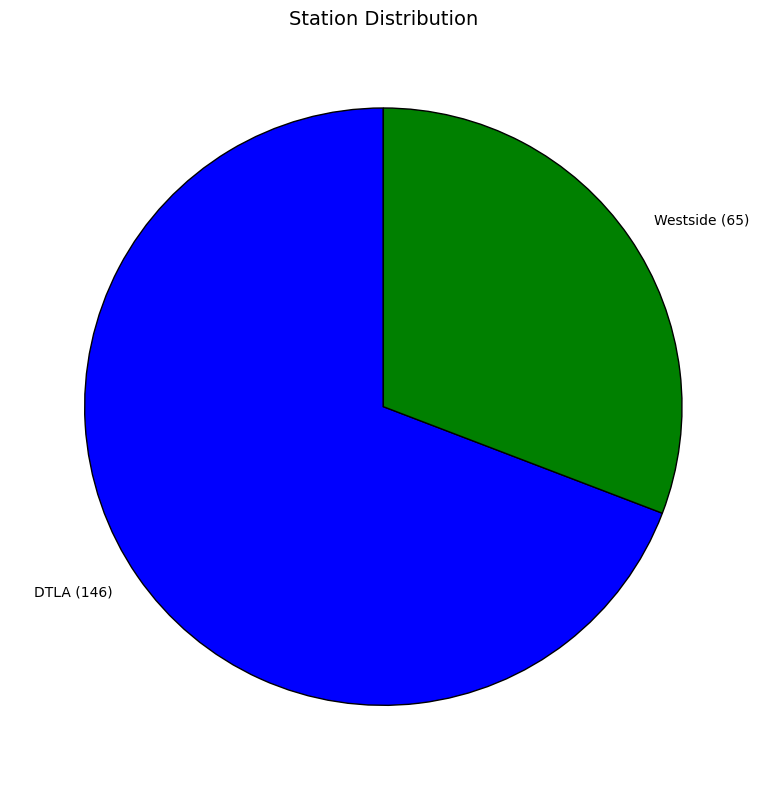

In [728]:
station_counts = stations.groupby('start_station_region')['start_station'].nunique()
plt.figure(figsize=(12, 8))
plt.pie(
    station_counts,
    labels=[f"{label} ({count})" for label, count in zip(station_counts.index, station_counts.values)],
    startangle=90,
    colors=['blue', 'green'],  # Red for DTLA, Blue for Westside
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Station Distribution', fontsize=14)
plt.tight_layout()
plt.show()

---
## Station Openings

The scatter plot beneath illustrates the number of station openings across the **Downtown LA** and **Westside** regions from **2020 to 2024**.

Through additional research, it was found that **LA Metro Bikes conducted regular maintenance on Westside stations and the coronavirus outbreak**, which may have affected how station activity was recorded during the earlier years. Consequently, the time span for this analysis has been defined to ensure an accurate representation of active stations, starting in **late 2020** and concluding on **December 31, 2024**.

---

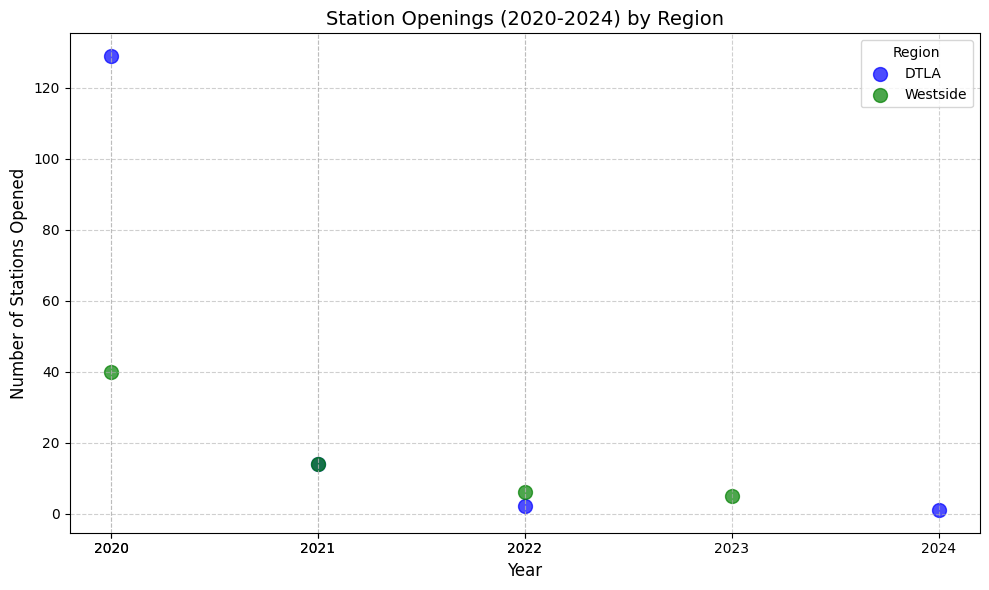

In [731]:
stations_openings = stations.groupby(['start_station_name', 'start_station_region'])['start_date'].min().reset_index()
stations_openings.columns = ['station_name', 'region', 'first_trip_date']
stations_openings['first_trip_year'] = stations_openings['first_trip_date'].dt.year
recent_stations = stations_openings[
    (stations_openings['first_trip_year'] >= 2020) & (stations_openings['first_trip_year'] <= 2024)
]

openings_per_year_region = recent_stations.groupby(['first_trip_year', 'region']).size().reset_index(name='stations_opened')
region_colors = {'DTLA': 'blue', 'Westside': 'green'}

plt.figure(figsize=(10, 6))
for region in openings_per_year_region['region'].unique():
    region_data = openings_per_year_region[openings_per_year_region['region'] == region]
    plt.scatter(
        region_data['first_trip_year'],
        region_data['stations_opened'],
        color=region_colors[region],
        s=100,
        alpha=0.7,
        label=region
    )

plt.title('Station Openings (2020-2024) by Region', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Stations Opened', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(openings_per_year_region['first_trip_year'], fontsize=10)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

---

## Key Observations from the Scatter Plot:
- Since 2021 the distribution of new stations between **Downtown LA** and the  **Westside** is balanced with none of the regions opening more new stations compared to the other. The dominance of stations in Downtown is due to it's launch back in 2016 and high density location, yet due to inconsistencies with stations being closed and opened 2020 starts with the stations that have already been opened in the years before.

---

## Bike docks per station
Since the live station data was directly accessed through an api, the dock sizes are accurate and through plotting the distribution accross the Westside and Downtown looks as follows:

---

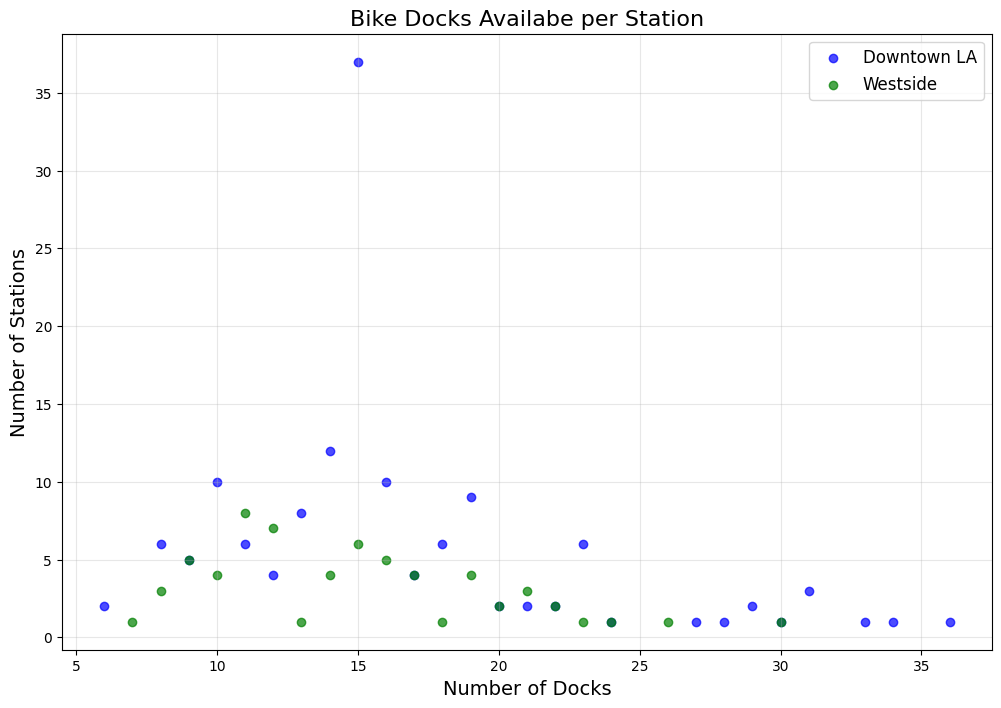

In [736]:
dtla_data = stations[stations['start_station_region'] == 'DTLA']
westside_data = stations[stations['start_station_region'] == 'Westside']
dtla_distribution = dtla_data.groupby('num_of_docks')['start_station'].nunique().reset_index()
dtla_distribution.columns = ['num_of_docks', 'num_of_stations']
westside_distribution = westside_data.groupby('num_of_docks')['start_station'].nunique().reset_index()
westside_distribution.columns = ['num_of_docks', 'num_of_stations']

plt.figure(figsize=(12, 8))
plt.scatter(dtla_distribution['num_of_docks'], dtla_distribution['num_of_stations'], 
            color='blue', alpha=0.7, label='Downtown LA')
plt.scatter(westside_distribution['num_of_docks'], westside_distribution['num_of_stations'], 
            color='green', alpha=0.7, label='Westside')

plt.title('Bike Docks Availabe per Station', fontsize=16)
plt.xlabel('Number of Docks', fontsize=14)
plt.ylabel('Number of Stations', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

---

### Key Observations Number of Bike Docks:
1. **Distribution of Docks**:
   - Downtown LA stations (blue points) generally have a higher number of docks compared to the Westside stations (green points)
   - The Westside stations appear more concentrated in the range of 10-20 docks, while Downtown LA exhibits a wider range
---

2. **Frequency of Station Sizes**:
   - The majority of stations have between 10-20 docks, indicating a typical station size in the system
   - Both regions show a tail of stations with fewer docks (less than 10) and a few stations with higher capacities (above 25)
---

3. **The 34-Dock Station**:
   - While the station with **34 docks** might appear to be an outlier, it is not. This station is the **Union Station** in Downtown LA, a major transportation hub
   - It makes sense for Union Station to have a significantly higher number of docks, as it serves a large number of commuters and acts as a key node for bike-sharing in the city

---

4. **Regional Differences**:
   - Downtown LA stations have a more diverse distribution of dock sizes, accommodating the higher demand expected in an urban core.
   - The Westside stations are more uniform, with dock sizes clustered in the middle range, reflecting the less dense nature of this region.

---

 
# Seasonality

**Climate:** 
Los Angeles experiences a **Mediterranean climate**, characterized by **mild, wet winters** and **hot, dry summers**.
Average temperatures in **Downtown LA** range from **50°F (10°C) in January** to **85°F (29°C) in August**, making it conducive for biking year-round. The Westside, which includes areas like Santa Monica and Venice, benefits from the cooling effects of the **Pacific Ocean**, resulting in slightly cooler temperatures compared to Downtown LA, particularly during summer months.

 **Rainfall:**: Rainfall is minimal during the summer months (June to September) and peaks in **winter months**, especially in January and February.

**Geograph:y**
**Downtown LA** is the urban core, featuring high population density, commercial hubs, and major transit connections like Union Station. This environment supports high trip volumes, especially among commuters.
The **Westside** is known for its proximity to beaches, residential neighborhoods, and recreational attractions like the Santa Monica Pier and Venice Beach. Bike usage here often correlates with tourism, leisure activities, and good weather conditions.

---


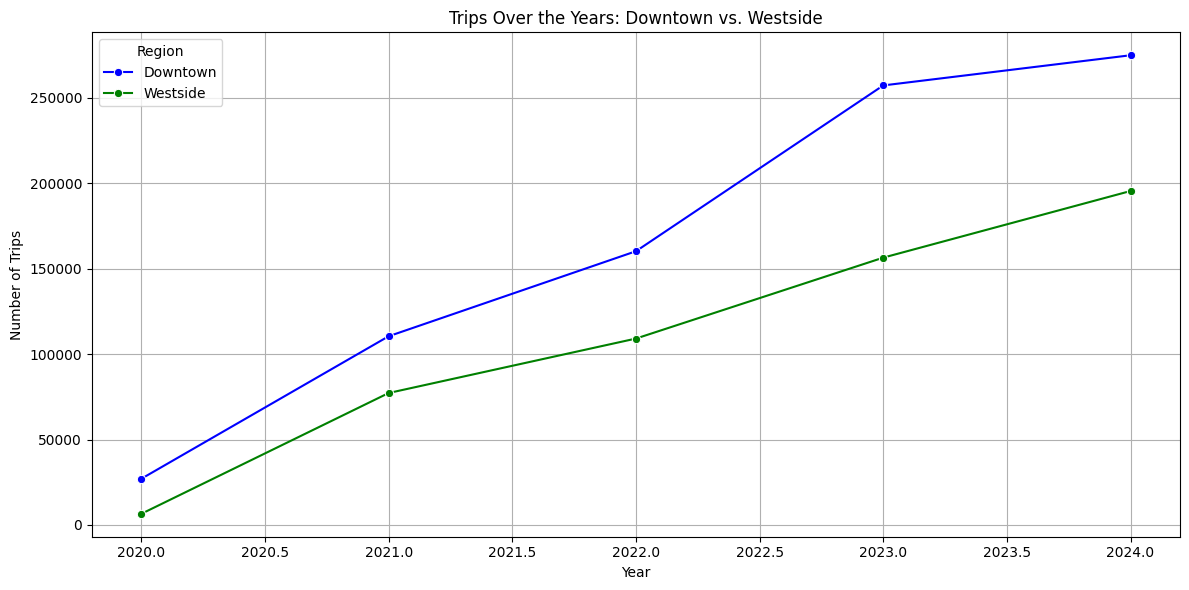

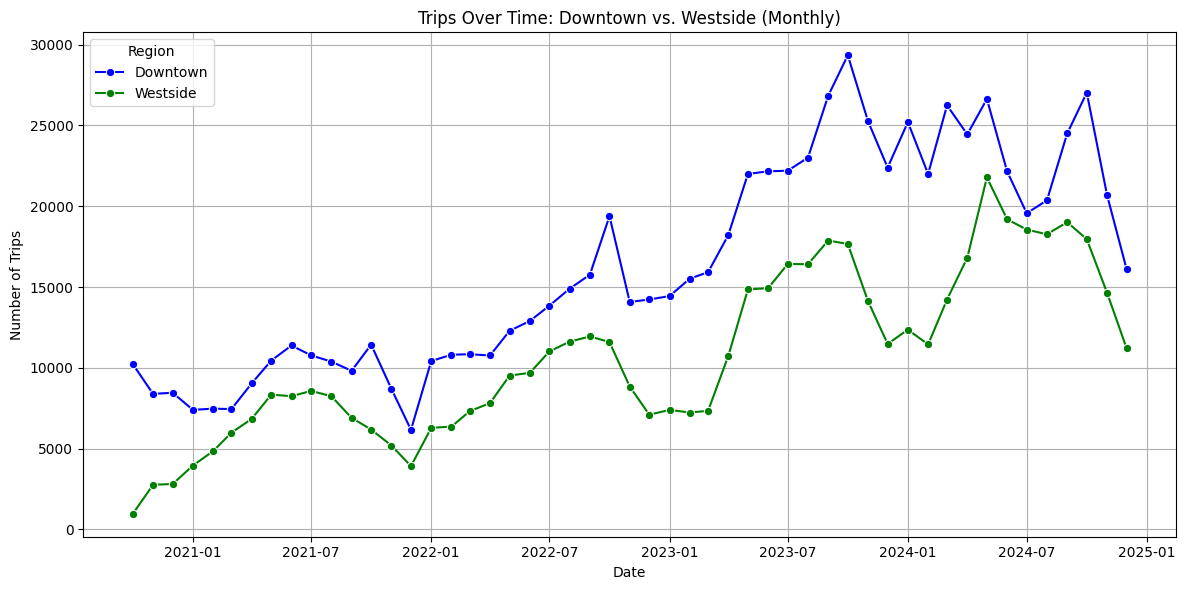

In [740]:
downtown_data = stations[stations['start_station_region'] == 'DTLA']
westside_data = stations[stations['start_station_region'] == 'Westside']
downtown_yearly_trips = downtown_data.groupby('year')['trip_id'].count().reset_index()
westside_yearly_trips = westside_data.groupby('year')['trip_id'].count().reset_index()
downtown_yearly_trips['region'] = 'Downtown'
westside_yearly_trips['region'] = 'Westside'
yearly_trips = pd.concat([downtown_yearly_trips, westside_yearly_trips])

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trips, x='year', y='trip_id', hue='region', 
             palette={'Downtown': 'blue', 'Westside': 'green'}, marker='o')
plt.title('Trips Over the Years: Downtown vs. Westside')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

downtown_data = stations[stations['start_station_region'] == 'DTLA']
westside_data = stations[stations['start_station_region'] == 'Westside']
downtown_monthly_trips = downtown_data.groupby(['year', 'month'])['trip_id'].count().reset_index()
westside_monthly_trips = westside_data.groupby(['year', 'month'])['trip_id'].count().reset_index()
downtown_monthly_trips['region'] = 'Downtown'
westside_monthly_trips['region'] = 'Westside'

monthly_trips = pd.concat([downtown_monthly_trips, westside_monthly_trips])
monthly_trips['date'] = pd.to_datetime(monthly_trips['year'].astype(str) + '-' + monthly_trips['month'].astype(str))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trips, x='date', y='trip_id', hue='region', 
             palette={'Downtown': 'blue', 'Westside': 'green'}, marker='o', errorbar='sd')
plt.title('Trips Over Time: Downtown vs. Westside (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

---

#### **Graph 1: Trips Over the Years (Yearly)**
1. **Steady Growth in Trip Volumes**:
   - Both Downtown LA and the Westside show a steady increase in bike trips over the years
   - Downtown LA (blue line) consistently has higher trip volumes than the Westside (green line) across all years

---

2. **Downtown LA Dominance**:
   - By 2024, Downtown LA trip volumes reach approximately 275,000 trips annually, nearly **1.5x** the Westside's 180,000 trips
   - This aligns with the high population density, commuter activity, and larger dock sizes in Downtown LA

---
3. **Consistent Growth in the Westside**:
   - The Westside shows steady growth, with a lower but proportional increase in trips. The growth reflects its appeal for recreational use and an increasing reliance on bike infrastructure over time
  
---

#### **Graph 2: Trips Over Time (Monthly)**
1. **Seasonal Variability**:
   - Both regions show **peaks in spring and summer months** (e.g., March-July), likely driven by favorable weather, increased outdoor activities, and tourism, particularly in the Westside
   - **Winter dips** (e.g., December-January) are evident in both regions, coinciding with cooler temperatures and occasional rainfall

---
2. **Downtown LA Peaks**:
   - Downtown LA shows consistent monthly peaks with strong upward trends during summer, likely driven by commuter traffic and sustained demand for bike-sharing infrastructure

---
3. **Westside's Recreational Nature**:
   - The Westside demonstrates more pronounced seasonal fluctuations, reflecting its reliance on leisure and tourism activities. Peaks in the summer are sharper, while dips during colder months are more pronounced compared to Downtown LA
  
---

# Quarterly Trip Analysis

Quarterly trends reveal fluctuations influenced by factors such as weather or promotional efforts. While Downtown LA displays steady growth and pronounced peaks, the Westside follows similar trends on a smaller scale, with consistent usage patterns throughout the year, **but more significant drops between quarters**.

---

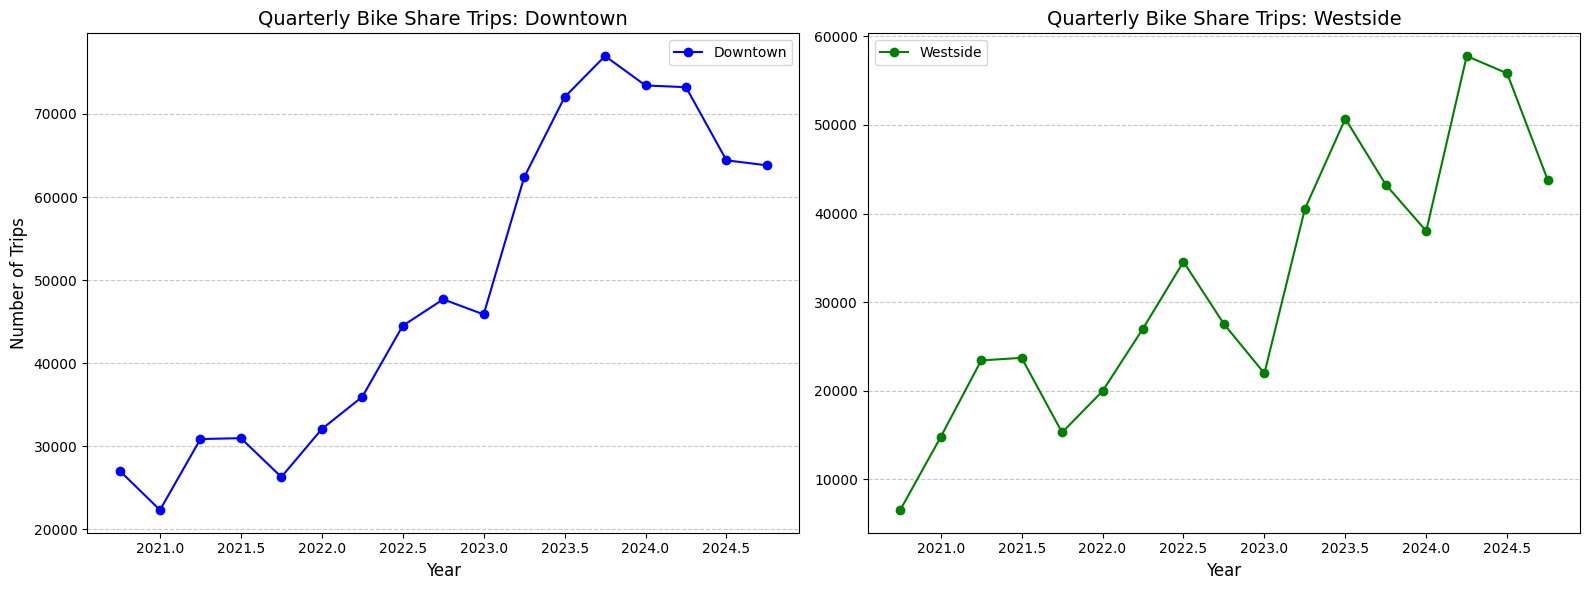

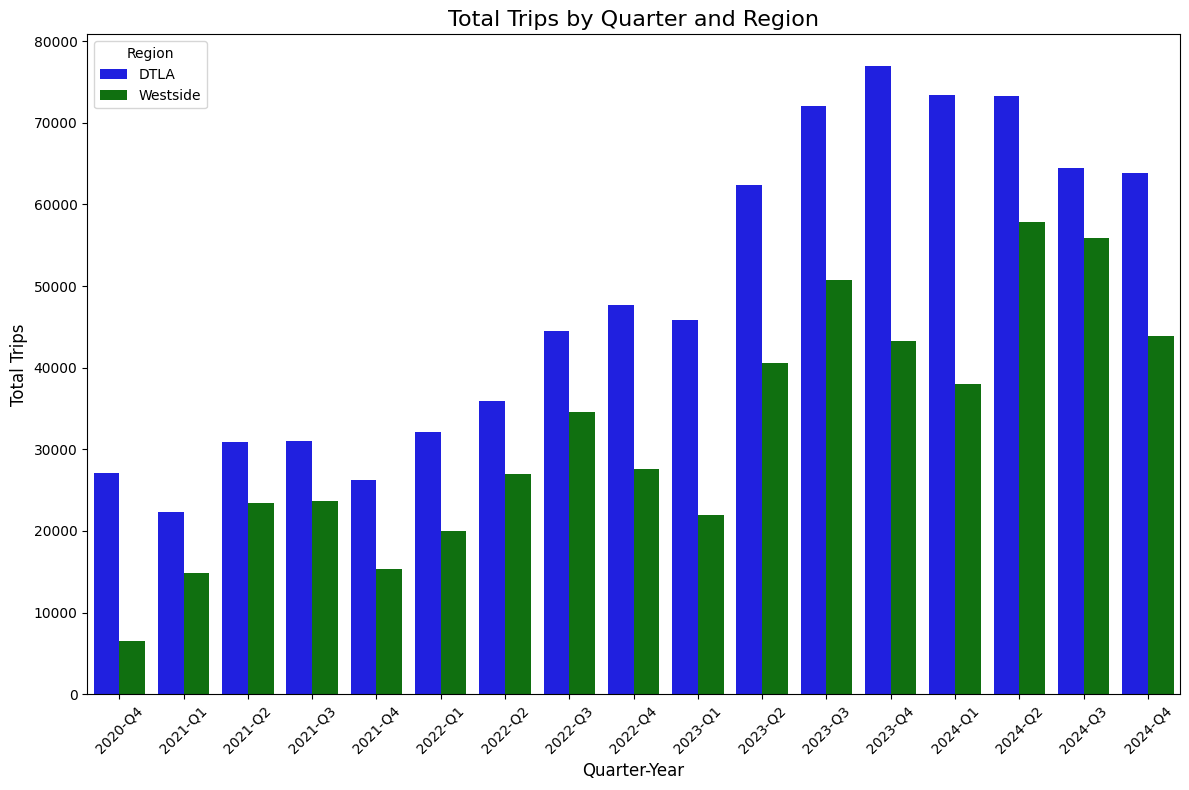

In [743]:
downtown_data = stations[stations['start_station_region'] == 'DTLA'].copy()
downtown_data['year'] = downtown_data['start_date'].dt.year
downtown_data['quarter'] = (downtown_data['start_date'].dt.month - 1) // 3 + 1
downtown_quarterly_trips = downtown_data.groupby(['year', 'quarter'])['trip_id'].count().reset_index()

westside_data = stations[stations['start_station_region'] == 'Westside'].copy()
westside_data['year'] = westside_data['start_date'].dt.year
westside_data['quarter'] = (westside_data['start_date'].dt.month - 1) // 3 + 1
westside_quarterly_trips = westside_data.groupby(['year', 'quarter'])['trip_id'].count().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Line-Plot Downtown 
axes[0].plot(
    downtown_quarterly_trips['year'] + (downtown_quarterly_trips['quarter'] - 1) / 4,  
    downtown_quarterly_trips['trip_id'],
    marker='o',
    label='Downtown',
    color='blue'
)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Trips', fontsize=12)
axes[0].set_title('Quarterly Bike Share Trips: Downtown', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(fontsize=10)

# Line-Plot Westside
axes[1].plot(
    westside_quarterly_trips['year'] + (westside_quarterly_trips['quarter'] - 1) / 4,  
    westside_quarterly_trips['trip_id'],
    marker='o',
    label='Westside',
    color='green'
)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_title('Quarterly Bike Share Trips: Westside', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(fontsize=10)
plt.tight_layout()
plt.show()

# Bar Chart
filtered_data['year'] = filtered_data['start_date'].dt.year
filtered_data['quarter'] = filtered_data['start_date'].dt.quarter

region_quarterly_counts = (
    filtered_data.groupby(['start_station_region', 'year', 'quarter'])['trip_id']
    .count()
    .reset_index()
)
region_quarterly_counts.columns = ['region', 'year', 'quarter', 'total_trips']
region_quarterly_counts['year_quarter'] = (
    region_quarterly_counts['year'].astype(str) + '-Q' + region_quarterly_counts['quarter'].astype(str)
)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='year_quarter',
    y='total_trips',
    hue='region',
    data=region_quarterly_counts,
    palette={'DTLA': 'blue', 'Westside': 'green'}
)
plt.title('Total Trips by Quarter and Region', fontsize=16)
plt.xlabel('Quarter-Year', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.legend(title='Region', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Seasonality
#### **Conclusion**:
- **Downtown LA**:
  - Serves as a commuter hub with steady year-round growth and higher overall trip volumes
  - Less sensitive to seasonal fluctuations, possibly due to more consistent commuter demand

---

- **Westside**:
  - Heavily influenced by weather and tourism patterns, with significant peaks during warmer months
  - Steady year-on-year growth reflects the increasing adoption of bike-sharing for recreational and utility purposes

These trends highlight the differing roles and usage patterns of bike-sharing systems in urban and recreational areas, emphasizing the need for tailored resource allocation and strategic planning to meet seasonal and regional demands

---

# Best and Underperforming Stations
Identifying the **top 10 performing** stations and the **10 most underperforming** stations is a crucial step in understanding the dynamics of the bike-sharing system. This approach provides actionable insights into both high-demand and low-demand areas, enabling targeted improvements and better resource optimization.

**High-performing stations** often reflect areas with strong demand due to their proximity to transit hubs, business districts, or popular tourist attractions. These stations may require **additional resources**, such as more docks or bikes, to meet demand and prevent shortages.
On the other hand, **underperforming stations** can highlight areas where adoption is low, potentially due to poor location planning, lack of accessibility, or insufficient awareness. Understanding these patterns allows for the redistribution of resources to maximize efficiency.

Analyzing these extremes also helps uncover success factors that contribute to a station’s popularity, such as infrastructure support or strategic placement. For underperforming stations, barriers to usage can be identified and addressed, whether they stem from geographic challenges, seasonal factors, or lack of integration with commuter routes.  By focusing on the most successful and least successful stations, the analysis aims to give a overall view of station behaviour due to the total of 223 stations. 

**Downtown LA demonstrates higher trip volumes overall**, driven by consistent commuter usage and well-performing stations like Union Station. In contrast, **the Westside shows more seasonal variation**, with top stations catering to recreational users. These trends emphasize the need for region-specific strategies: sustaining commuter infrastructure in Downtown LA while accommodating seasonal peaks and addressing underperformance during off-peak months in the Westside.

---

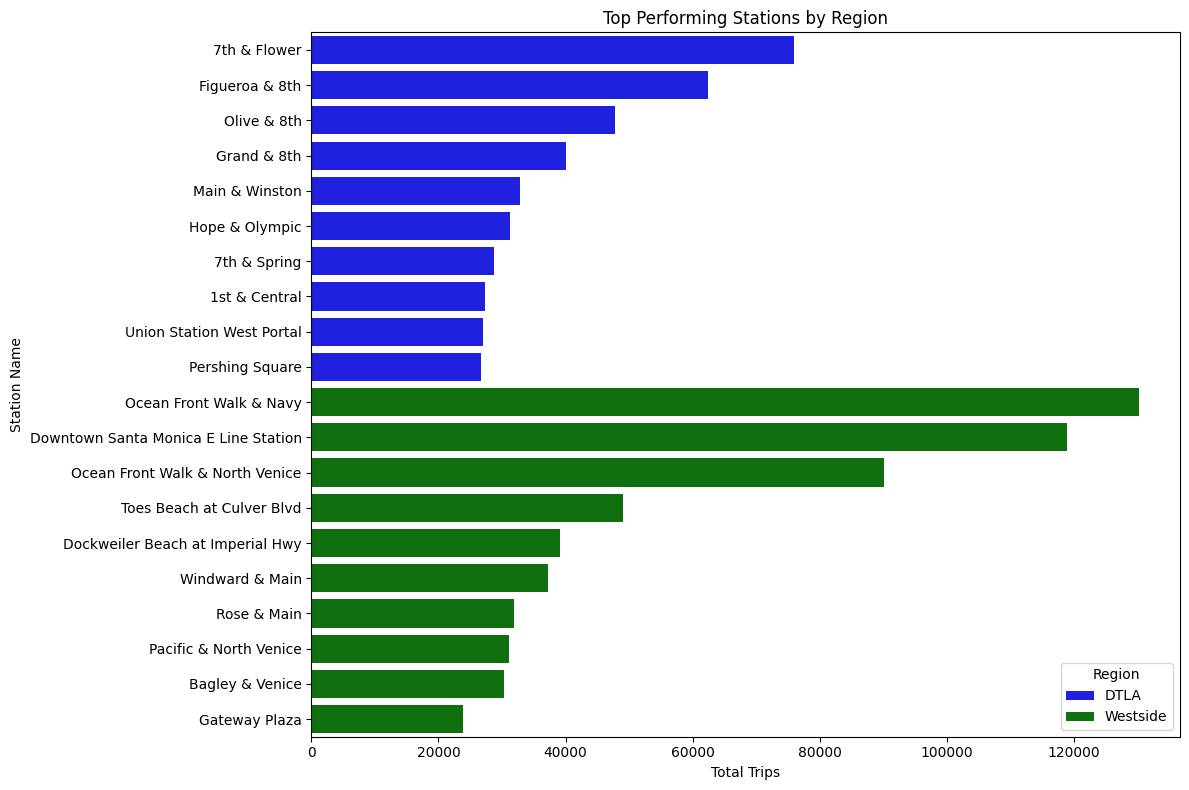

In [748]:
plt.close('all')
starting_trips = stations.groupby(['start_station_name', 'start_station_region'])['trip_id'].count().reset_index()
starting_trips.columns = ['station_name', 'region', 'starting_trips']
ending_trips = stations.groupby(['end_station_name', 'end_station_region'])['trip_id'].count().reset_index()
ending_trips.columns  = ['station_name', 'region', 'ending_trips']

station_demand = pd.merge(starting_trips, ending_trips, on = ['station_name', 'region'], how = 'outer').fillna(0)
station_demand['total_trips'] = station_demand['starting_trips'] + station_demand['ending_trips']

def top_and_bottom_by_region(df, n=10):
    top_stations = df.sort_values(['region', 'total_trips'], ascending = [True,False]).groupby('region').head(n)
    bottom_stations = df.sort_values(['region', 'total_trips'], ascending = [True, True]).groupby('region').head(n)
    return top_stations, bottom_stations

top_10_by_region, bottom_10_by_region = top_and_bottom_by_region(station_demand,n=10)

region_colors = {'DTLA': 'blue', 'Westside': 'green'}
                                     
plt.figure(figsize=(12, 8))
sns.barplot(x='total_trips', y='station_name', hue = 'region',data = top_10_by_region, dodge = False, palette= region_colors)
plt.title('Top Performing Stations by Region')
plt.xlabel('Total Trips')
plt.ylabel('Station Name')
plt.legend(title ='Region', loc = 'lower right')
plt.tight_layout()
plt.show()

---
**Downtown LA:**
7th & Flower is the highest-performing station, with a significantly larger volume of trips compared to other stations in the region.
Other top stations, such as Union West Portal, 1st & Central, and Figueroa & 8th, maintain high volumes, indicating their importance as commuter hubs in the dense urban core.

**Westside:**
Stations like Ocean Front Walk & Navy, Downtown Santa Monica E Line Station, and Ocean Front Walk & North Venice dominate trip volumes.
These stations serve as key recreational and tourist locations, which is consistent with the Westside's geography and demographics.

---

## Dock Availability for each Top Station

In [755]:
stations_docks = stations[['start_station_name', 'start_station_region', 'num_of_docks']].drop_duplicates()
stations_docks.columns = ['station_name', 'region', 'num_of_docks']
top_10_with_docks = pd.merge(top_10_by_region, stations_docks, on=['station_name', 'region'], how='left')

posx and posy should be finite values
posx and posy should be finite values


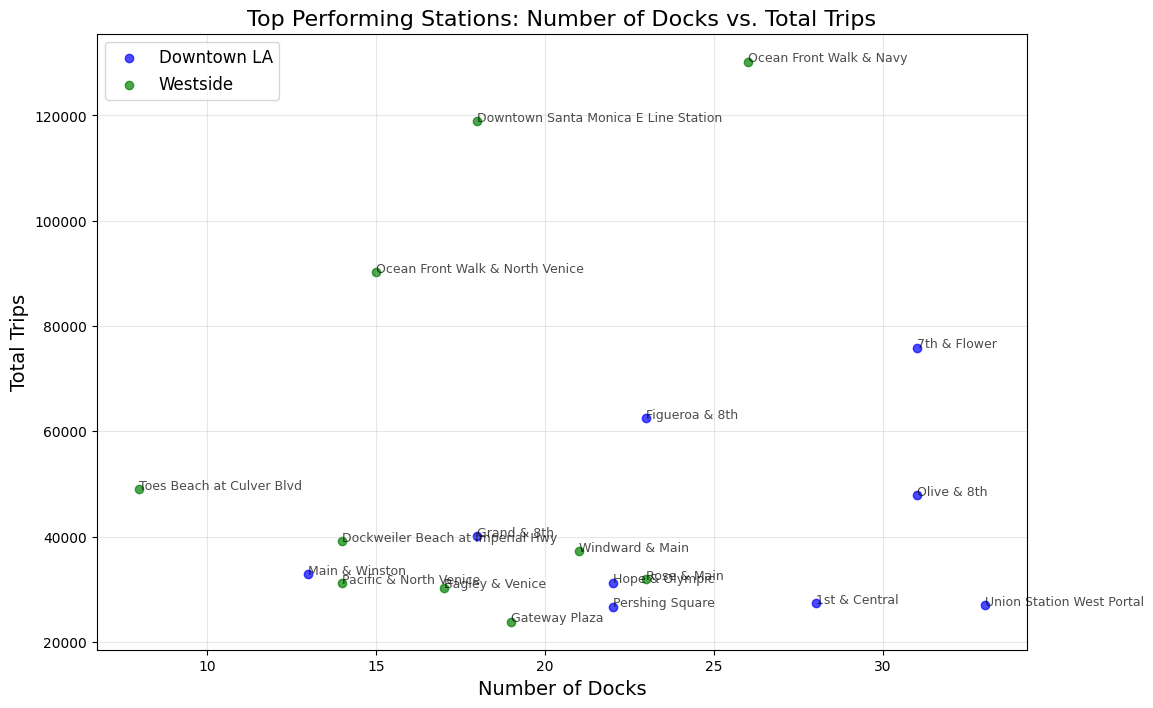

In [757]:
plt.figure(figsize=(12, 8))

dtla_top = top_10_with_docks[top_10_with_docks['region'] == 'DTLA']
plt.scatter(dtla_top['num_of_docks'], dtla_top['total_trips'], 
            color='blue', alpha=0.7, label='Downtown LA')

for i, row in dtla_top.iterrows():
    plt.text(row['num_of_docks'], row['total_trips'], row['station_name'], fontsize=9, alpha=0.7)

westside_top = top_10_with_docks[top_10_with_docks['region'] == 'Westside']
plt.scatter(westside_top['num_of_docks'], westside_top['total_trips'], 
            color='green', alpha=0.7, label='Westside')

for i, row in westside_top.iterrows():
    plt.text(row['num_of_docks'], row['total_trips'], row['station_name'], fontsize=9, alpha=0.7)

plt.title('Top Performing Stations: Number of Docks vs. Total Trips', fontsize=16)
plt.xlabel('Number of Docks', fontsize=14)
plt.ylabel('Total Trips', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

---
### Key Comparisons: Number of Docks vs. Total Trips Top Performing Stations

The comparison of **number of docks** and **total trips** for the top-performing stations reveals important insights into the efficiency and utilization of bike-sharing infrastructure in Downtown LA and the Westside.

#### Observations:
1. **High Utilization of Stations in the Westside**:
   - Stations like **Ocean Front Walk & Navy** and **Downtown Santa Monica E Line Station** lead in total trips, despite having a moderate number of docks (15-20).
   - This indicates high demand and effective usage in these popular recreational and tourist areas.
   - The **seasonal nature** of the Westside’s usage likely contributes to these stations' prominence.

---
2. **Downtown LA’s Larger Infrastructure**:
   - Stations like **Union Station West Portal** and **1st & Central** have a significantly higher number of docks (30-35) compared to most Westside stations.
   - This infrastructure aligns with their roles as commuter hubs, ensuring a steady supply of bikes for a high volume of daily users.

---
3. **Balance Between Docks and Trips**:
   - Some Downtown LA stations, such as **7th & Flower** and **Figueroa & 8th**, achieve a high number of trips relative to their dock sizes, indicating efficient utilization.
   - Similarly, **Ocean Front Walk & Navy** in the Westside demonstrates excellent performance by maintaining high trip counts with relatively fewer docks.

---
4. **Union Station’s Dominance**:
   - **Union Station West Portal** stands out as the station with the most docks and a correspondingly high trip volume. Its role as a major transit hub justifies the additional infrastructure and consistent commuter traffic.

---
5. **Geographical and Functional Differences**:
   - Downtown LA stations tend to have more docks, reflecting their importance in supporting commuter demand and ensuring a reliable supply of bikes throughout the day.
   - Westside stations cater more to **tourist and leisure riders**, with fewer docks but higher seasonal trip spikes, as evidenced by the strong performance of stations near beaches and recreational areas.

---

### Insights from Low Performing Stations by Region

The analysis of the lowest-performing stations in Downtown LA and the Westside provides highlights insights into underutilized infrastructure and the potential reasons for their performance.

The low-performing stations highlight opportunities for optimization and resource reallocation. Downtown LA stations with oversized docks require a reevaluation of demand, while Westside stations may benefit from improved connectivity and community engagement.

---

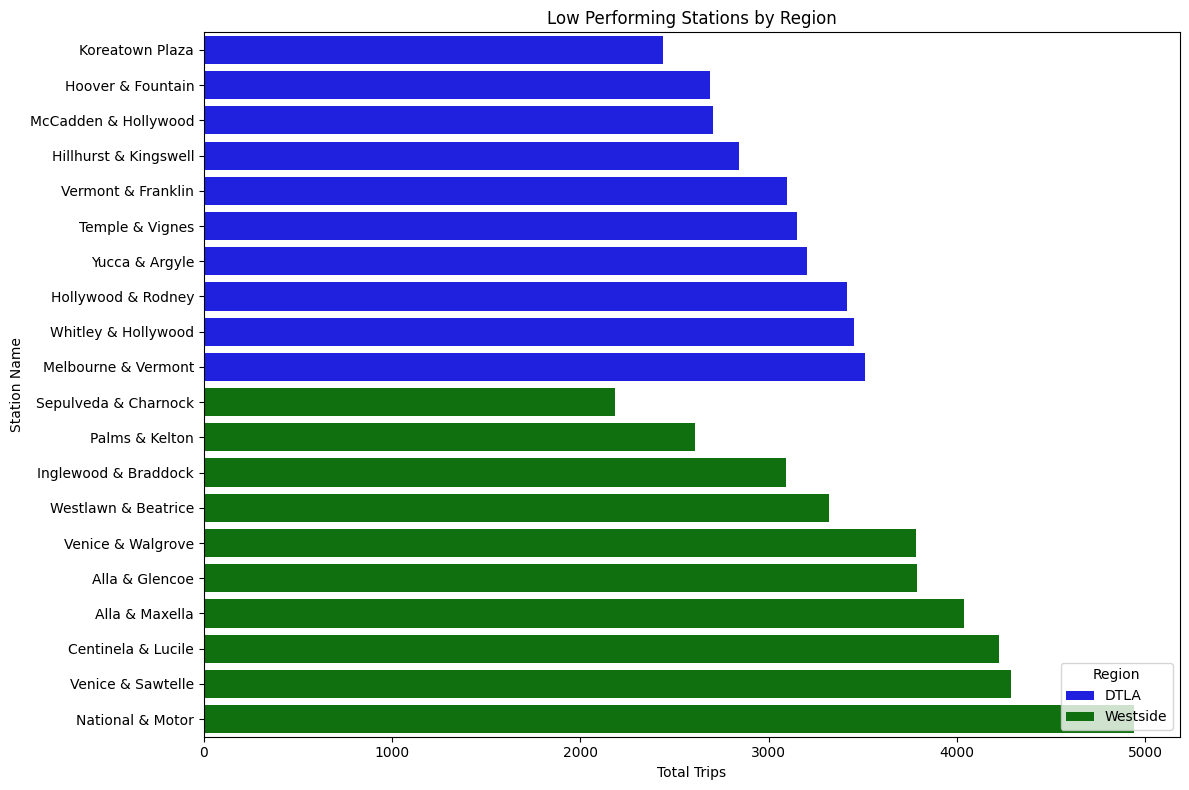

In [760]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_trips', y='station_name', hue ='region', data=bottom_10_by_region, dodge = False, palette=region_colors)
plt.title('Low Performing Stations by Region')
plt.xlabel('Total Trips')
plt.ylabel('Station Name')
plt.legend(title = 'Region', loc = 'lower right')
plt.tight_layout()
plt.show() 

In [762]:
stations_docks = stations[['start_station_name', 'start_station_region','num_of_docks']].drop_duplicates()
stations_docks.columns = ['station_name', 'region', 'num_of_docks']
bottom_10_with_docks = pd.merge(bottom_10_by_region, stations_docks, on=['station_name', 'region'], how='left')

posx and posy should be finite values
posx and posy should be finite values


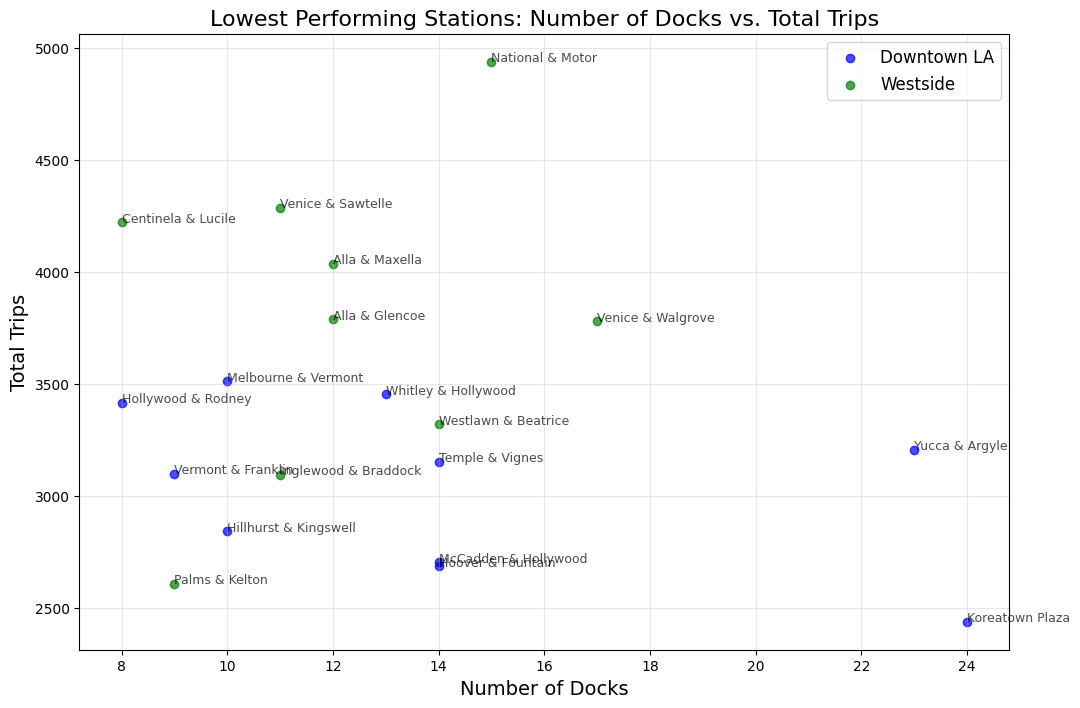

In [764]:
plt.figure(figsize=(12, 8))

dtla_bottom = bottom_10_with_docks[bottom_10_with_docks['region'] == 'DTLA']
plt.scatter(dtla_bottom['num_of_docks'], dtla_bottom['total_trips'], 
            color='blue', alpha=0.7, label='Downtown LA')

for i, row in dtla_bottom.iterrows():
    plt.text(row['num_of_docks'], row['total_trips'], row['station_name'], fontsize=9, alpha=0.7)

westside_bottom = bottom_10_with_docks[bottom_10_with_docks['region'] == 'Westside']
plt.scatter(westside_bottom['num_of_docks'], westside_bottom['total_trips'], 
            color='green', alpha=0.7, label='Westside')

for i, row in westside_bottom.iterrows():
    plt.text(row['num_of_docks'], row['total_trips'], row['station_name'], fontsize=9, alpha=0.7)

plt.title('Lowest Performing Stations: Number of Docks vs. Total Trips', fontsize=16)
plt.xlabel('Number of Docks', fontsize=14)
plt.ylabel('Total Trips', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

---

#### Key Observations:

1. **Total Trips and Dock Utilization**:
   - **Downtown LA**:
     - Stations like **Koreatown Plaza** and **Yucca & Argyle** have more docks (20+), but their total trip counts remain low compared to expectations. This suggests an **oversupply of docks** in areas with lower demand
     - Other stations, such as **McCadden & Hollywood** and **Hoover & Fountain**, have smaller dock sizes but still underperform, indicating a lack of user demand or poor station placement
   - **Westside**:
     - Stations like **National & Motor** and **Venice & Sawtelle** have moderate dock sizes (~15-20) but perform poorly in terms of trips, hinting at low adoption in these areas
     - Smaller stations, such as **Inglewood & Braddock** and **Palms & Kelton**, show consistently low trip volumes, potentially due to less foot traffic or accessibility issues

---
2. **Regional Comparisons**:
   - **Downtown LA** stations, on average, have larger dock sizes than those in the Westside, but this doesn’t necessarily translate to higher trip volumes for underperforming stations
   - **Westside** stations exhibit more consistent dock sizes (10-20) but struggle with trip volumes, likely due to lower population density or limited infrastructure support in these areas

---
3. **Potential Causes for Underperformance**:
   - **Poor Accessibility**: Stations may be located in areas with limited foot traffic or poor connectivity to other transportation networks
   - **Infrastructure Mismatch**: Oversized docks, such as those at Koreatown Plaza, suggest a misalignment between supply and demand
   - **Geographic Barriers**: Stations in areas with hilly terrain or limited cycling infrastructure may discourage usage
---
4. **Opportunities for Improvement**:
   - **Relocation**: Low-performing stations with high dock counts, such as Koreatown Plaza, could be relocated to areas with higher demand
   - **Community Engagement**: Increasing awareness and promoting cycling in these regions could boost demand, especially in areas with sufficient docks but low trip volumes
   - **Seasonal Adjustments**: Temporary dock reductions at Westside stations during off-peak months may optimize resource allocation

---
#### Conclusion:
The low-performing stations highlight opportunities for optimization and resource reallocation. Downtown LA stations with oversized docks require a reevaluation of demand, while Westside stations may benefit from improved connectivity and community engagement.

---
## Station Analysis Trips: Starting vs Ending 

### Overall Findings

The analysis of starting and ending trips reveals that, across all stations, there appears to be a **balance between trips starting and ending at each location**. Neither Downtown LA nor the Westside shows a station with a significant disparity between starting and ending trips, even among the top-performing or low-performing stations. 

This balance indicates that the bike-sharing network successfully supports a combination of commuting and leisure activities. While some stations in Downtown LA lean slightly more towards being departure hubs, and Westside stations cater to round-trip usage, no station shows an extreme peak in either starting or ending trips. This suggests that the system is well-integrated and effectively meeting the diverse needs of its users.

---

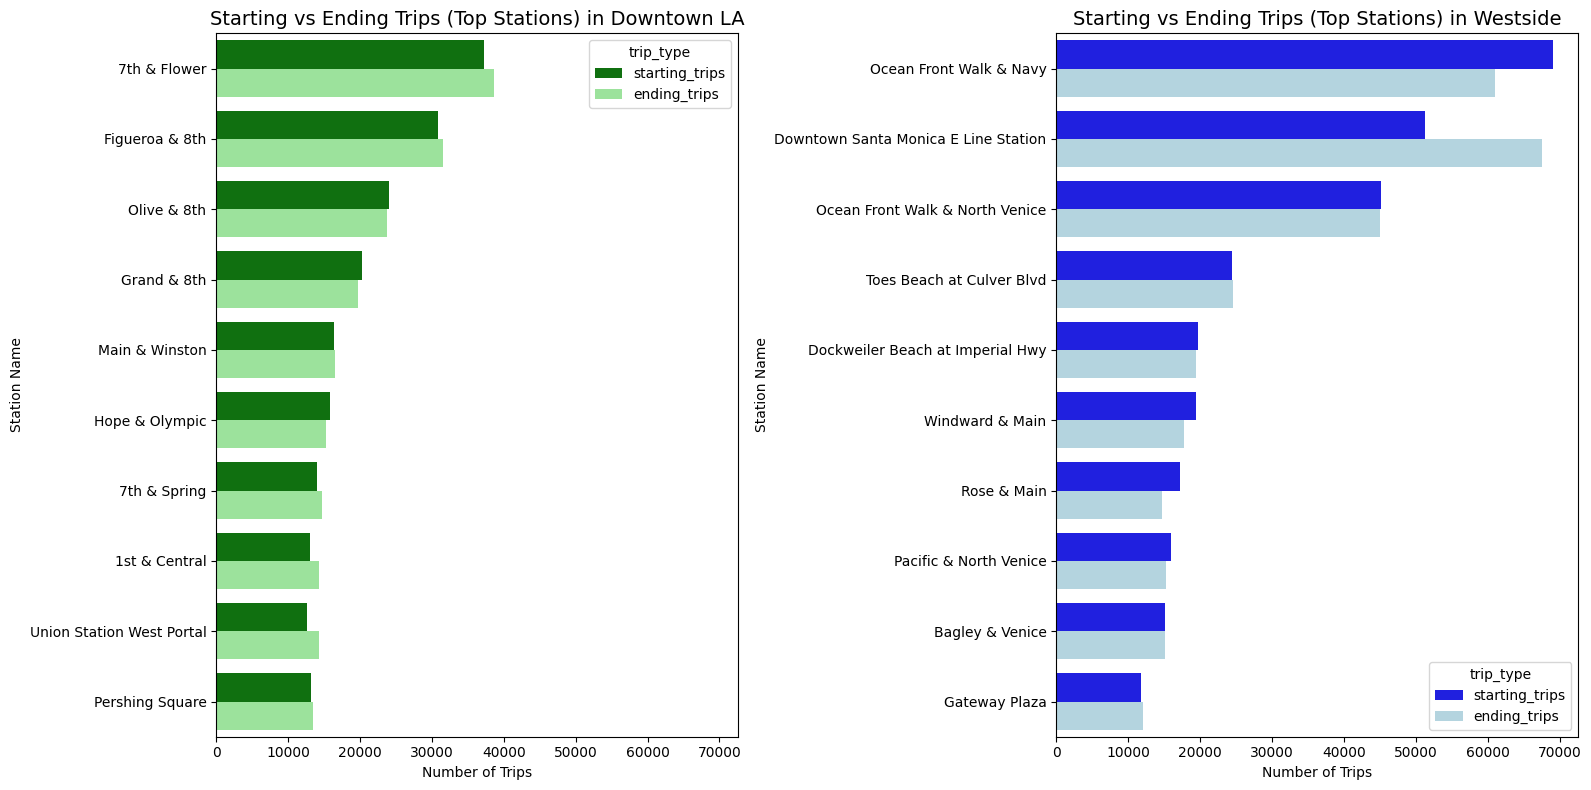

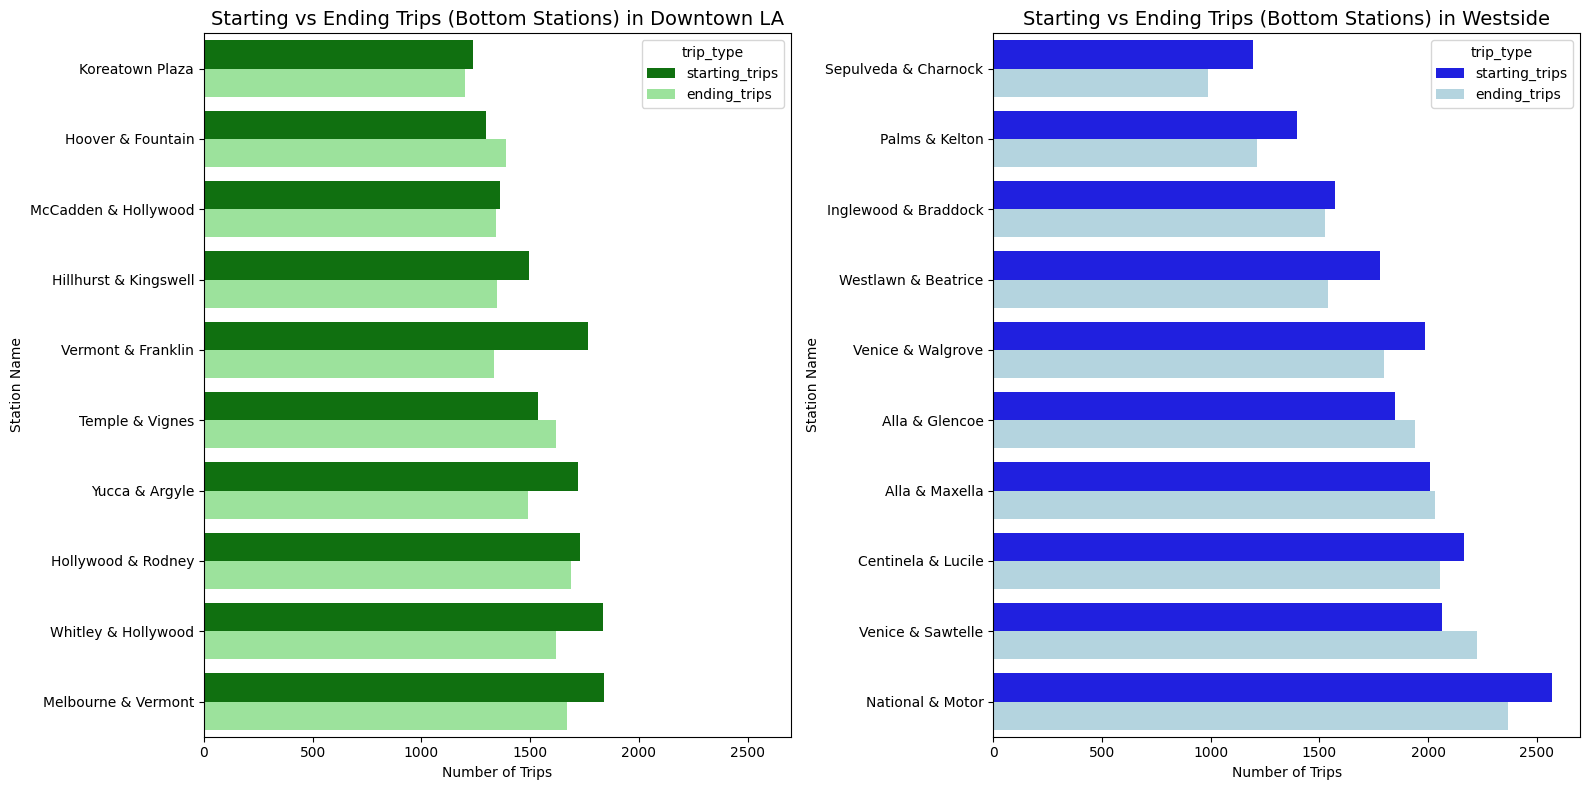

In [768]:
plt.close('all')

def plot_station_trips_by_region(df, title_prefix, palette):
    # Split data into Downtown LA and Westside
    df_dtla = df[df['region'] == 'DTLA']
    df_westside = df[df['region'] == 'Westside']

    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)

    def plot_data(ax, region_df, region_title, colors):
        if not region_df.empty:
            df_melted = region_df.melt(
                id_vars=['station_name', 'region', 'total_trips'],
                value_vars=['starting_trips', 'ending_trips'],
                var_name='trip_type',
                value_name='trips'
            )
            sns.barplot(
                x='trips',
                y='station_name',
                hue='trip_type',
                data=df_melted,
                dodge=True,
                palette=colors,
                ax=ax
            )
            ax.set_title(region_title, fontsize=14)
            ax.set_xlabel('Number of Trips')
            ax.set_ylabel('Station Name')

    plot_data(
        axes[0], df_dtla,
        f'{title_prefix} in Downtown LA',  # Dynamically set the title
        {'starting_trips': 'green', 'ending_trips': 'lightgreen'}
    )

    plot_data(
        axes[1], df_westside,
        f'{title_prefix} in Westside',  # Dynamically set the title
        {'starting_trips': 'blue', 'ending_trips': 'lightblue'}
    )
    plt.tight_layout()
    plt.show()

plot_station_trips_by_region(top_10_by_region, 'Starting vs Ending Trips (Top Stations)', {'starting_trips': 'Blues'})
plot_station_trips_by_region(bottom_10_by_region, 'Starting vs Ending Trips (Bottom Stations)', {'starting_trips': 'Reds'})

---

## User Behaviour Analysis: Trip Category (One-Way or Round-Trip)

The analysis of round trips and one-way trips across the stations in Downtown LA and the Westside showcases interesting differences in how these regions utilize the bike-sharing system.

#### Downtown LA (Top Stations):
- One-way trips dominate across most top-performing stations in Downtown LA, such as **1st & Central**, **7th & Flower**, and **Figueroa & 8th**
- This pattern aligns with Downtown LA's role as a **commuter hub**, where users typically travel one way to or from work, transit connections, or other urban destinations
- Round trips, while present, are a smaller proportion of total trips, suggesting that Downtown LA's bike-sharing system is predominantly used for point-to-point travel rather than leisure or recreational purposes

#### Westside (Top Stations):
- In contrast to Downtown LA, Westside stations show a more balanced mix of one-way and round trips, with some stations, such as **Ocean Front Walk & Navy** and **Downtown Santa Monica E Line Station**, having a higher proportion of round trips
- This balance reflects the Westside's **recreational and leisure-oriented usage**, where users are more likely to return to the starting station after completing their activities
- Stations near popular recreational areas, such as **Toes Beach at Culver Blvd** and **Dockweiler Beach at Imperial Hwy**, see significant round-trip activity, supporting their role as destinations for tourists and locals engaging in outdoor activities

---

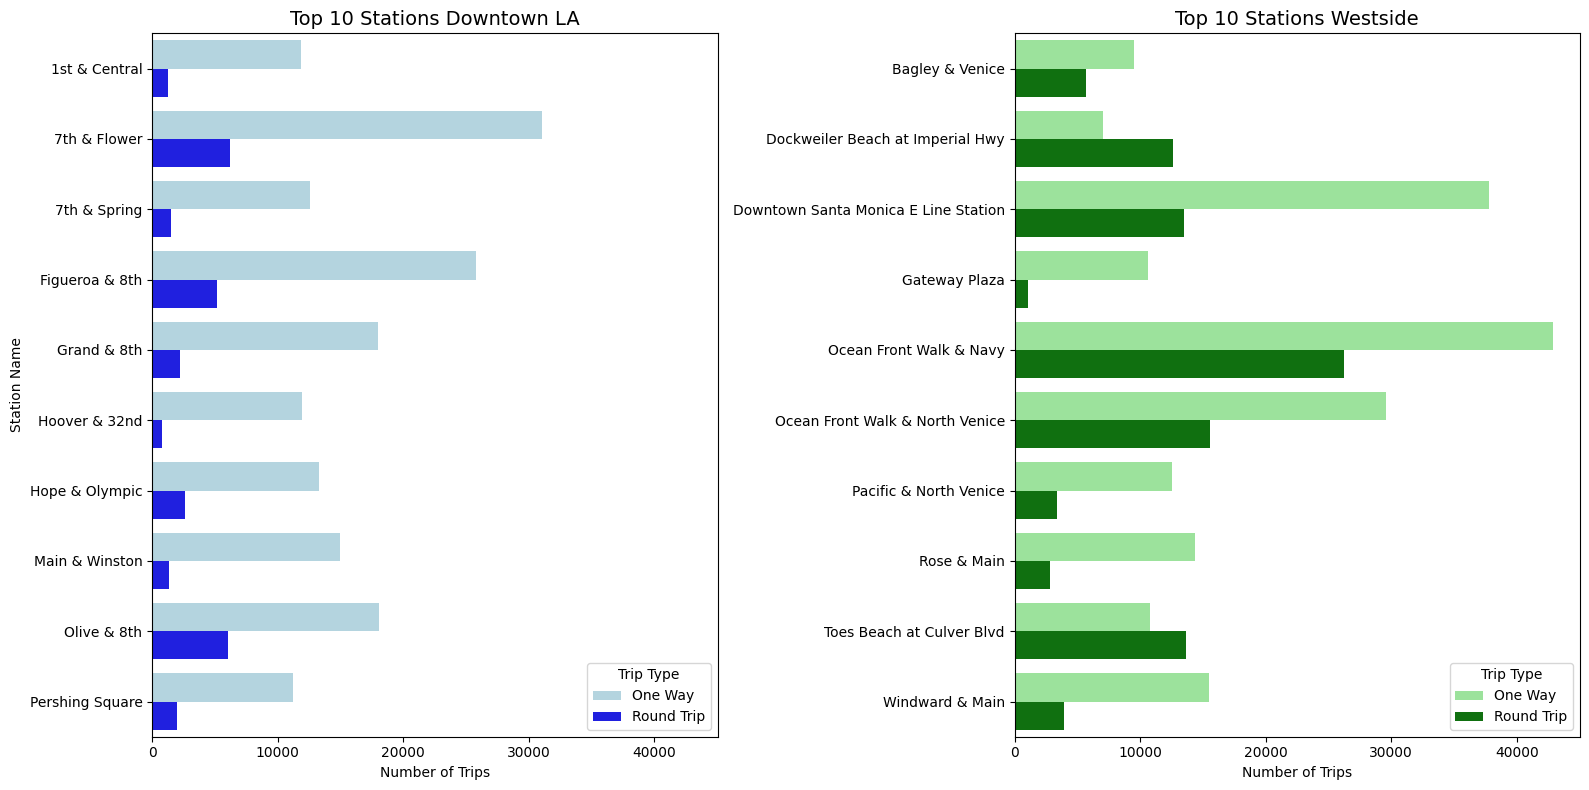

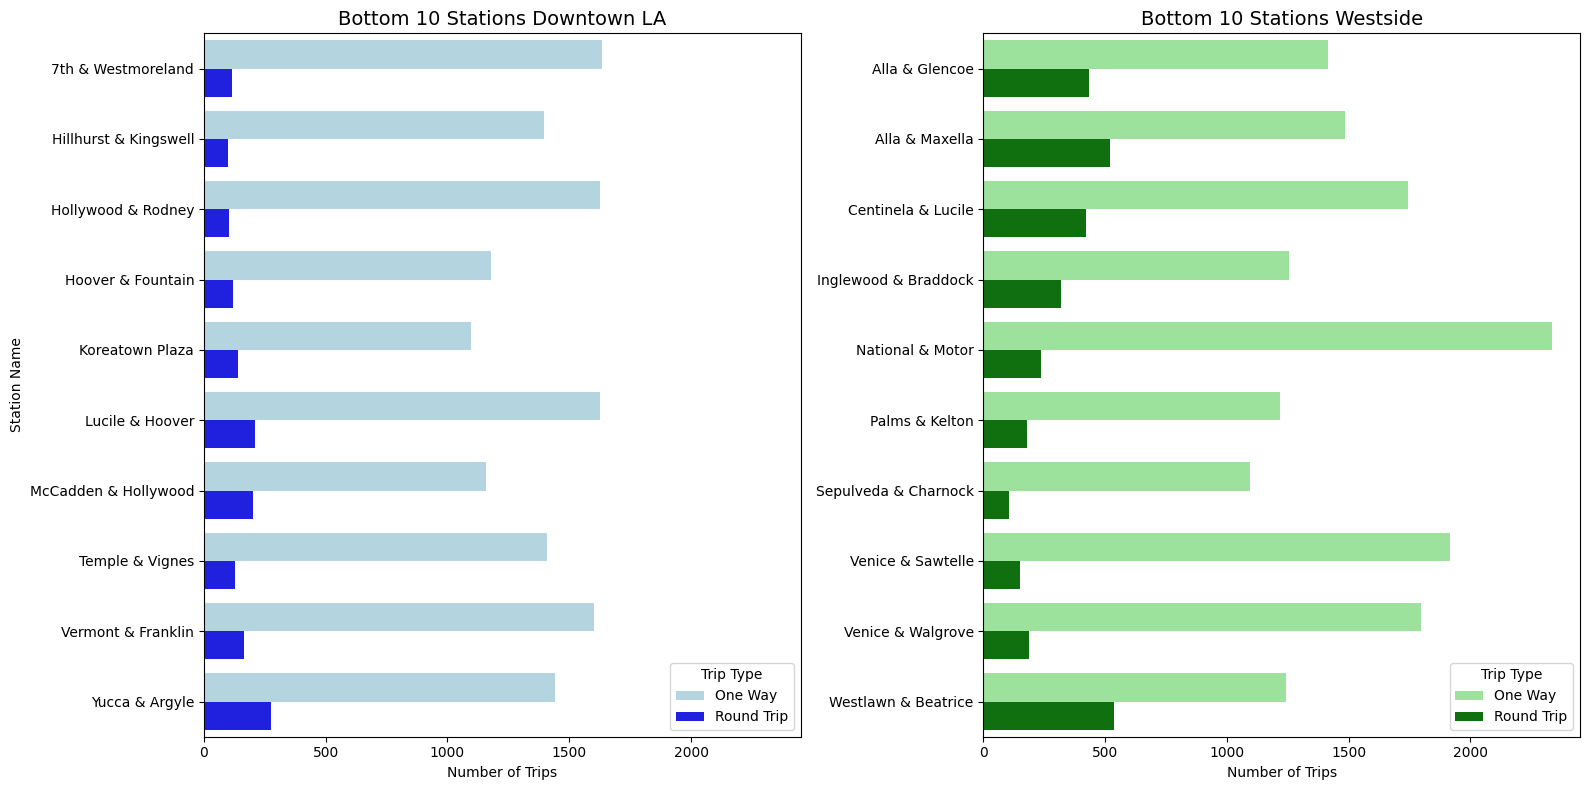

In [772]:
def plot_trip_counts(df, title_prefix, sort_order, palette_dtla, palette_westside):

    filtered_data = df[df['start_station_region'].isin(['DTLA', 'Westside'])]

    trip_counts = (
        filtered_data.groupby(['start_station_name', 'start_station_region', 'trip_route_category'])['trip_id']
        .count()
        .reset_index()
    )
    trip_counts.columns = ['station_name', 'region', 'trip_type', 'trips']

    dtla_stations = (
        trip_counts[trip_counts['region'] == 'DTLA']
        .groupby(['station_name'])['trips']
        .sum()
        .reset_index()
        .sort_values('trips', ascending=(sort_order == 'ascending'))
        .head(10)['station_name']
    )

    westside_stations = (
        trip_counts[trip_counts['region'] == 'Westside']
        .groupby(['station_name'])['trips']
        .sum()
        .reset_index()
        .sort_values('trips', ascending=(sort_order == 'ascending'))
        .head(10)['station_name']
    )

    trip_counts_dtla = trip_counts[trip_counts['station_name'].isin(dtla_stations)]
    trip_counts_westside = trip_counts[trip_counts['station_name'].isin(westside_stations)]

    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)

    sns.barplot(
        x='trips',
        y='station_name',
        hue='trip_type',
        data=trip_counts_dtla,
        dodge=True,
        palette=palette_dtla,
        ax=axes[0]
    )
    axes[0].set_title(f'{title_prefix} Downtown LA', fontsize=14)
    axes[0].set_xlabel('Number of Trips')
    axes[0].set_ylabel('Station Name')
    axes[0].legend(title='Trip Type', loc='lower right')
    
    sns.barplot(
        x='trips',
        y='station_name',
        hue='trip_type',
        data=trip_counts_westside,
        dodge=True,
        palette=palette_westside,
        ax=axes[1]
    )
    axes[1].set_title(f'{title_prefix} Westside', fontsize=14)
    axes[1].set_xlabel('Number of Trips')
    axes[1].set_ylabel('')
    axes[1].legend(title='Trip Type', loc='lower right')
    plt.tight_layout()
    plt.show()

plot_trip_counts(
    stations,
    'Top 10 Stations',
    'descending',
    palette_dtla={'Round Trip': 'blue', 'One Way': 'lightblue'},
    palette_westside={'Round Trip': 'green', 'One Way': 'lightgreen'}
)

plot_trip_counts(
    stations,
    'Bottom 10 Stations',
    'ascending',
    palette_dtla={'Round Trip': 'blue', 'One Way': 'lightblue'},
    palette_westside={'Round Trip': 'green', 'One Way': 'lightgreen'}
)


---
#### Key Observations:
- **Downtown LA's Low Performers:** These stations primarily cater to commuters, with minimal round-trip usage, suggesting a lack of recreational or multi-purpose utility
- **Westside's Low Performers:** While trip volumes are low, the presence of both one-way and round trips indicates some potential for recreational use, albeit limited

#### Conclusion:
The low-performing stations in both regions highlight the importance of strategic placement and accessibility. Downtown LA's underperforming stations are likely underutilized due to their location in areas with less commuter demand, while the Westside's low performers, though slightly better utilized, may benefit from improved connectivity to major recreational spots or enhanced local awareness campaigns to boost their usage.

---

## User Behaviour Analysis: Passholder Type
### Importance of Analyzing Passholder Distribution

Understanding passholder distribution at each station allocates insights into user behavior and the underlying reasons for station performance. By examining the types of passes used, such as annual, monthly, one-day, and walk-up passes, we can determine if certain stations serve recurring users like commuters or casual users like tourists and recreational riders. Additionally, this analysis helps  identify why underperforming stations might still be retained, as they could serve a specific niche of users or fulfill a strategic purpose.

**User Base Differences:**
   - Downtown LA: Predominantly regular commuters using annual or monthly passes
   - Westside: A mix of locals and tourists, with a strong presence of walk-up and one-day pass users
   
**Tourist vs. Commuter Demand:**
   - The Westside leverages its scenic and recreational appeal to attract casual riders
   - Downtown LA stations emphasize their strategic location for daily commuting needs

**Station Retention Justification:**
   - High walk-up and one-day pass usage in the Westside may justify retaining some stations despite lower overall performance, as they serve an important recreational or tourist purpose
   - In contrast, Downtown's focus on recurring passholders ensures consistent usage and operational efficiency

---


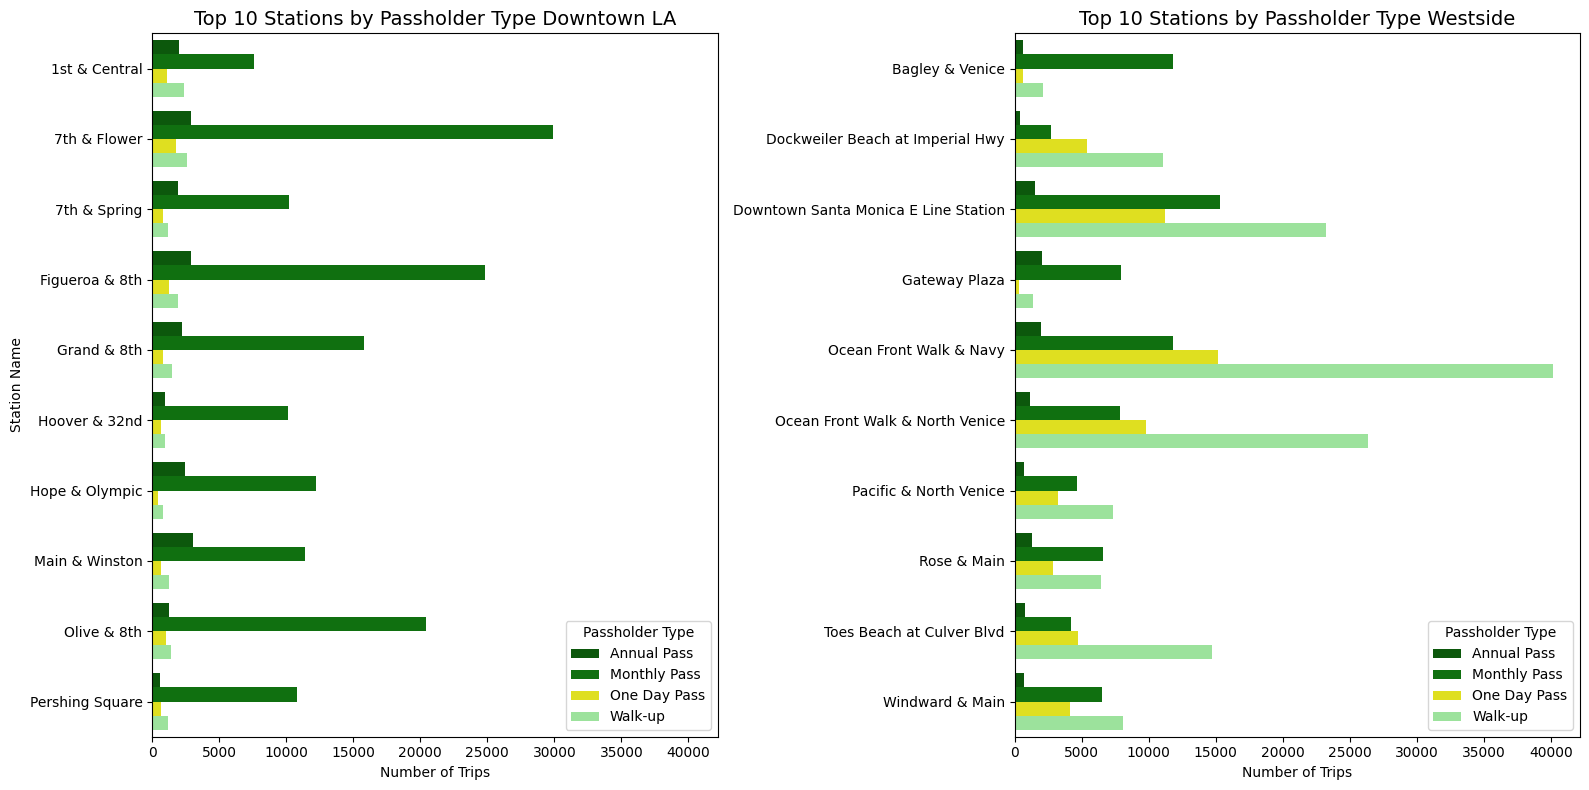

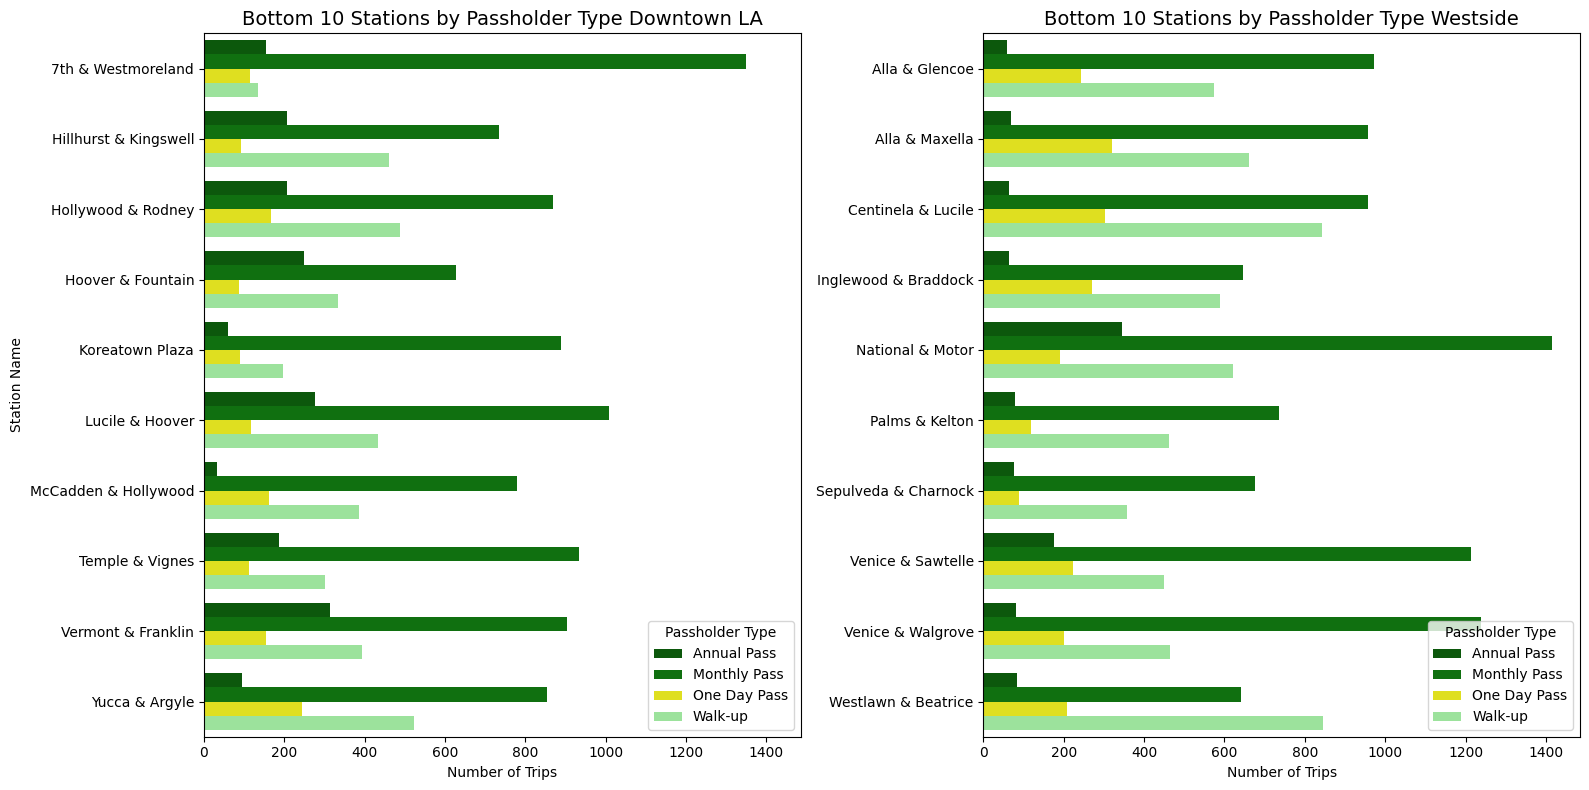

In [778]:
plt.close('all')
def plot_passholder_type_counts(df, title_prefix, sort_order, palette_dtla, palette_westside):
    """
    Create subplots for Downtown LA and Westside stations based on passholder type counts.

    Args:
    - df: DataFrame containing station data.
    - title_prefix: String prefix for subplot titles (e.g., "Top 10 Stations").
    - sort_order: 'ascending' or 'descending' for sorting station performance.
    - palette_dtla: Color palette for Downtown LA.
    - palette_westside: Color palette for Westside.
    """
    filtered_data = df[df['start_station_region'].isin(['DTLA', 'Westside'])]
    passholder_counts = (
        filtered_data.groupby(['start_station_name', 'start_station_region', 'passholder_type'])['trip_id']
        .count()
        .reset_index()
    )
    passholder_counts.columns = ['station_name', 'region', 'passholder_type', 'trips']

    dtla_stations = (
        passholder_counts[passholder_counts['region'] == 'DTLA']
        .groupby(['station_name'])['trips']
        .sum()
        .reset_index()
        .sort_values('trips', ascending=(sort_order == 'ascending'))
        .head(10)['station_name']
    )

    westside_stations = (
        passholder_counts[passholder_counts['region'] == 'Westside']
        .groupby(['station_name'])['trips']
        .sum()
        .reset_index()
        .sort_values('trips', ascending=(sort_order == 'ascending'))
        .head(10)['station_name']
    )

    passholder_counts_dtla = passholder_counts[passholder_counts['station_name'].isin(dtla_stations)]
    passholder_counts_westside = passholder_counts[passholder_counts['station_name'].isin(westside_stations)]

    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)

    sns.barplot(
        x='trips',
        y='station_name',
        hue='passholder_type',
        data=passholder_counts_dtla,
        dodge=True,
        palette=palette_dtla,
        ax=axes[0]
    )
    axes[0].set_title(f'{title_prefix} Downtown LA', fontsize=14)
    axes[0].set_xlabel('Number of Trips')
    axes[0].set_ylabel('Station Name')
    axes[0].legend(title='Passholder Type', loc='lower right')

    sns.barplot(
        x='trips',
        y='station_name',
        hue='passholder_type',
        data=passholder_counts_westside,
        dodge=True,
        palette=palette_westside,
        ax=axes[1]
    )
    axes[1].set_title(f'{title_prefix} Westside', fontsize=14)
    axes[1].set_xlabel('Number of Trips')
    axes[1].set_ylabel('')
    axes[1].legend(title='Passholder Type', loc='lower right')
    plt.tight_layout()
    plt.show()

passholder_palette = {
    'Monthly Pass': 'green',
    'Walk-up': 'lightgreen',
    'Annual Pass': 'darkgreen',
    'One Day Pass': 'yellow'
}

plot_passholder_type_counts(
    stations,
    'Top 10 Stations by Passholder Type',
    'descending',
    palette_dtla=passholder_palette,
    palette_westside=passholder_palette
)

plot_passholder_type_counts(
    stations,
    'Bottom 10 Stations by Passholder Type',
    'ascending',
    palette_dtla=passholder_palette,
    palette_westside=passholder_palette
)

---
#### Downtown LA Low-Performing Stations:
**Insights:**
  - While the overall trip volumes at these stations are low, monthly pass users suggest a presence of regular users, likely commuters or locals in specific pockets of the city
  - These stations might still fulfill niche roles in connecting lesser-used residential or commercial areas
#### Westside Low-Performing Stations:
**Insights:**
  - The Westside's low-performing stations appear to rely more on casual or recreational users, as indicated by the strong presence of walk-up and one-day pass users
  - However, stations like **National & Motor** and **Palms & Kelton** demonstrate some potential for improvement by targeting monthly pass users through better accessibility or marketing

### Comparison Between Downtown LA and Westside:
- Downtown LA’s low-performing stations have a slightly more uniform distribution of monthly pass users, reflecting their commuter-focused purpose even in underperforming locations
- In contrast, the Westside’s reliance on monthly pass users is concentrated in specific stations, with others relying heavily on casual users. This highlights a greater variance in user behavior, likely influenced by the recreational and tourist-oriented nature of the region
- **Key Finding:** Westside stations with higher monthly pass usage, such as **National & Motor**, may hold potential for further development, whereas Downtown stations like **Koreatown Plaza** already cater effectively to a small, steady user base

---

## Station Based Trip Volume Monthly

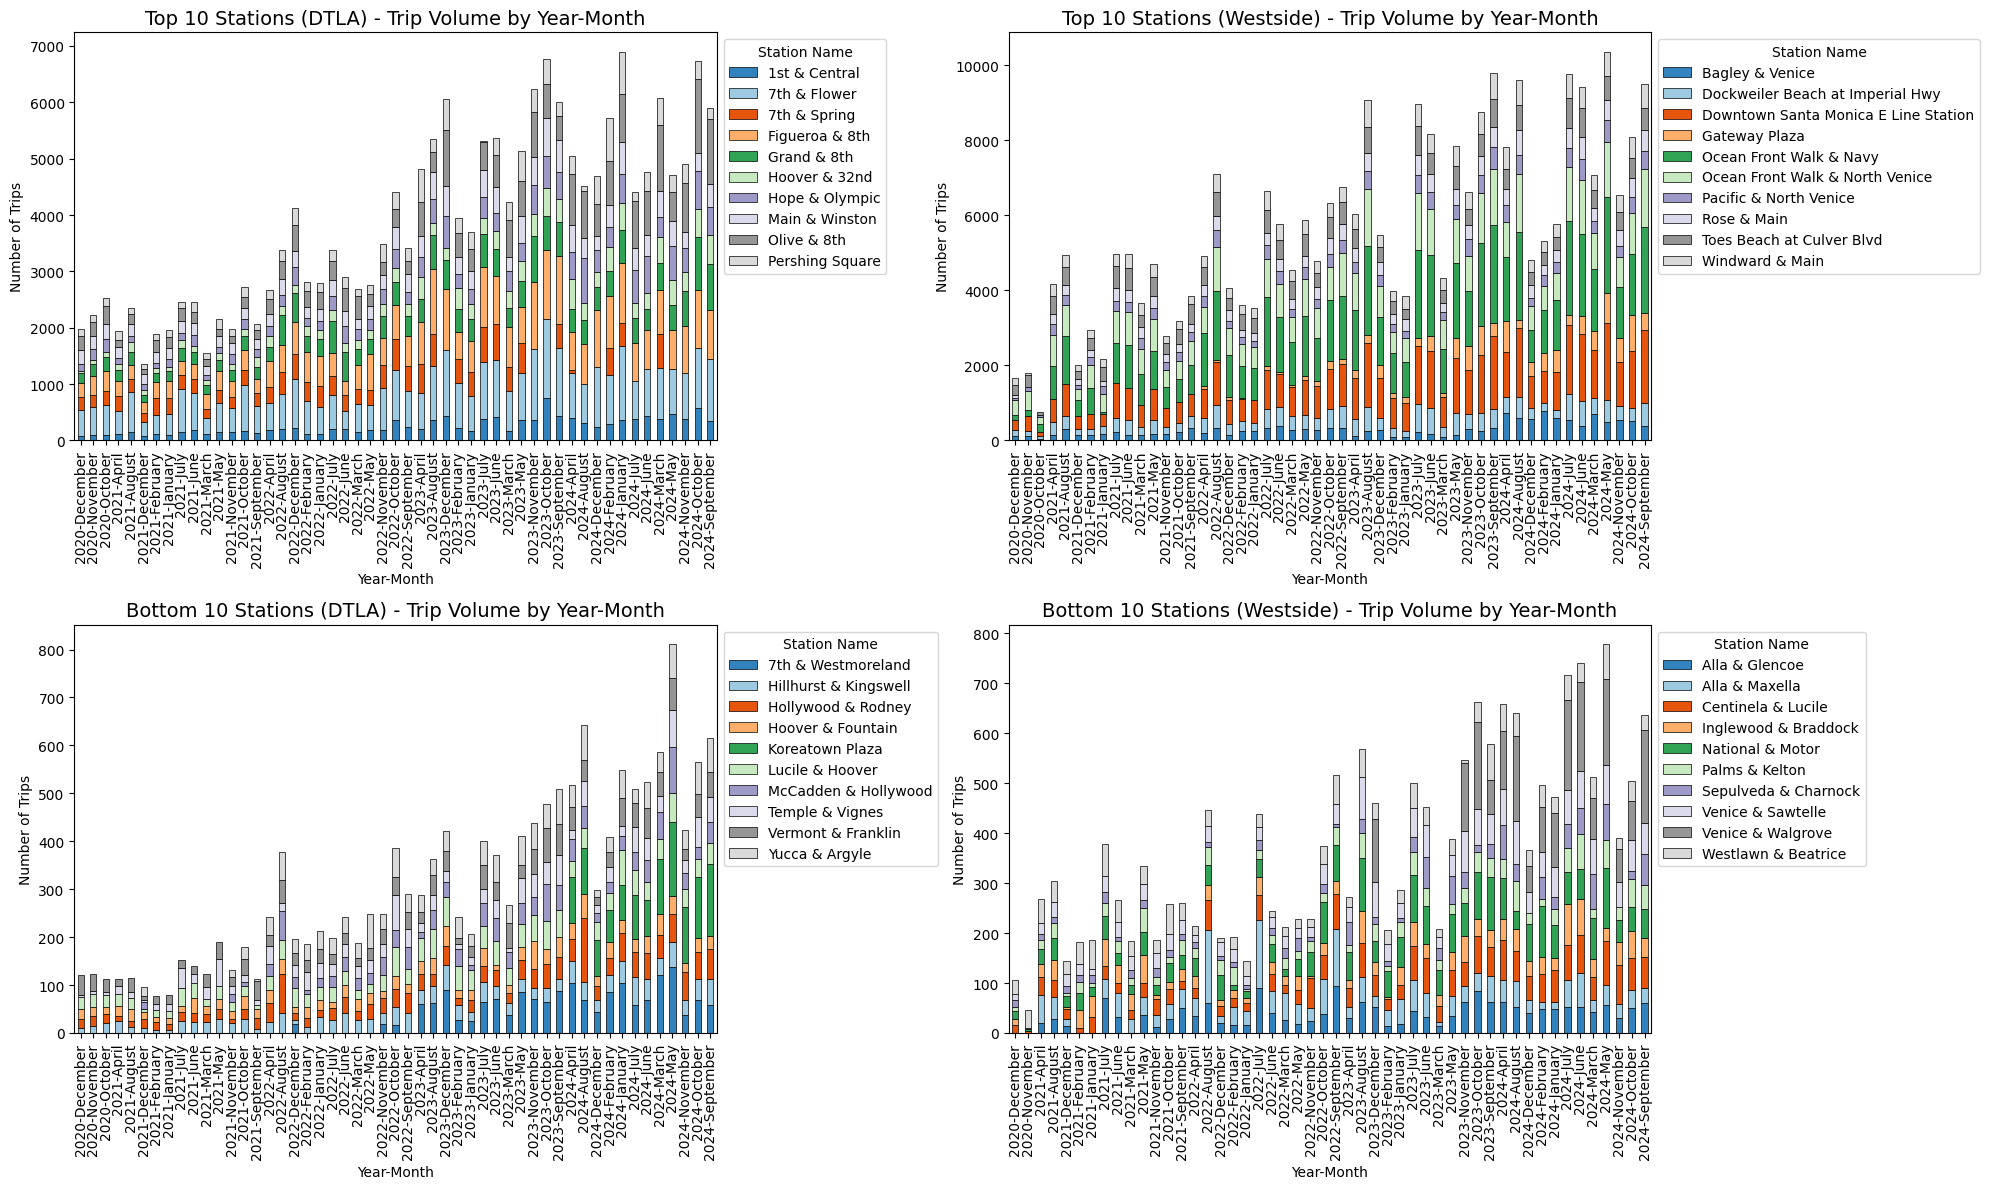

In [782]:
filtered_data = stations[stations['start_station_region'].isin(['DTLA', 'Westside'])]
filtered_data['year'] = filtered_data['start_date'].dt.year
filtered_data['month'] = filtered_data['start_date'].dt.month
filtered_data['month_name'] = filtered_data['month'].apply(lambda x: calendar.month_name[x])

trip_monthly_counts = (
    filtered_data.groupby(['start_station_name', 'start_station_region', 'year', 'month_name'])['trip_id']
    .count()
    .reset_index()
)
trip_monthly_counts.columns = ['station_name', 'region', 'year', 'month_name', 'trips']

def get_top_or_bottom_stations(data, region, n, ascending):
    return (
        data[data['region'] == region]
        .groupby(['station_name'])['trips']
        .sum()
        .reset_index()
        .sort_values('trips', ascending=ascending)
        .head(n)['station_name']
    )

top_stations_dtla = get_top_or_bottom_stations(trip_monthly_counts, 'DTLA', 10, ascending=False)
top_stations_westside = get_top_or_bottom_stations(trip_monthly_counts, 'Westside', 10, ascending=False)
bottom_stations_dtla = get_top_or_bottom_stations(trip_monthly_counts, 'DTLA', 10, ascending=True)
bottom_stations_westside = get_top_or_bottom_stations(trip_monthly_counts, 'Westside', 10, ascending=True)

def filter_stations(data, station_list):
    return data[data['station_name'].isin(station_list)]

trip_monthly_top_dtla = filter_stations(trip_monthly_counts, top_stations_dtla)
trip_monthly_top_westside = filter_stations(trip_monthly_counts, top_stations_westside)
trip_monthly_bottom_dtla = filter_stations(trip_monthly_counts, bottom_stations_dtla)
trip_monthly_bottom_westside = filter_stations(trip_monthly_counts, bottom_stations_westside)

def plot_stacked_bars(data, title, ax):
    # Make a copy to avoid modifying the original DataFrame
    data = data.copy()
    
    # Create a year-month column for grouping
    data['year_month'] = data['year'].astype(str) + '-' + data['month_name']
    pivot_data = data.pivot(index='year_month', columns='station_name', values='trips').fillna(0)
    pivot_data.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        cmap='tab20c',
        edgecolor='black',
        linewidth=0.5
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Number of Trips')
    ax.legend(title='Station Name', loc='upper left', bbox_to_anchor=(1, 1))

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

plot_stacked_bars(trip_monthly_top_dtla, 'Top 10 Stations (DTLA) - Trip Volume by Year-Month', axes[0, 0])
plot_stacked_bars(trip_monthly_top_westside, 'Top 10 Stations (Westside) - Trip Volume by Year-Month', axes[0, 1])
plot_stacked_bars(trip_monthly_bottom_dtla, 'Bottom 10 Stations (DTLA) - Trip Volume by Year-Month', axes[1, 0])
plot_stacked_bars(trip_monthly_bottom_westside, 'Bottom 10 Stations (Westside) - Trip Volume by Year-Month', axes[1, 1])

plt.tight_layout()
plt.show()

---
#### Top Performing Stations:
- Across both **Downtown LA** and the **Westside**, the top-performing stations exhibit a consistent upward trend in trip volume over the years. This growth is likely driven by a combination of increased ridership, better infrastructure, and strategic locations. 
- Monthly variations are observed, with some months showing peaks in trip volumes, possibly influenced by factors such as weather, holidays, or seasonal events
- The trip volumes for Downtown LA top stations generally maintain higher levels than those in the Westside, reflecting a more commuter-heavy usage pattern in the dense urban core

#### Bottom Performing Stations:
- The low-performing stations in both regions display significantly lower trip volumes, with monthly totals rarely exceeding 800 trips. These stations show slower growth, indicating limited adoption or reliance on these locations by users
- Monthly fluctuations are more pronounced for the Westside's low-performing stations, which might be more susceptible to seasonal recreational use rather than regular commuting patterns
- Downtown LA's low-performing stations show relatively steady trip volumes with slight growth, suggesting some sustained but niche use cases, possibly by local residents or occasional commuters
---

## Deep Dive Quarter Analysis

Downtown LA primarily caters to daily commuters and office workers, while the Westside serves a mix of tourists, locals, and leisure users. Analyzing these regions separately in quarters helps in tailoring operational strategies, such as optimizing dock placements, passholder plans, and marketing efforts.

---

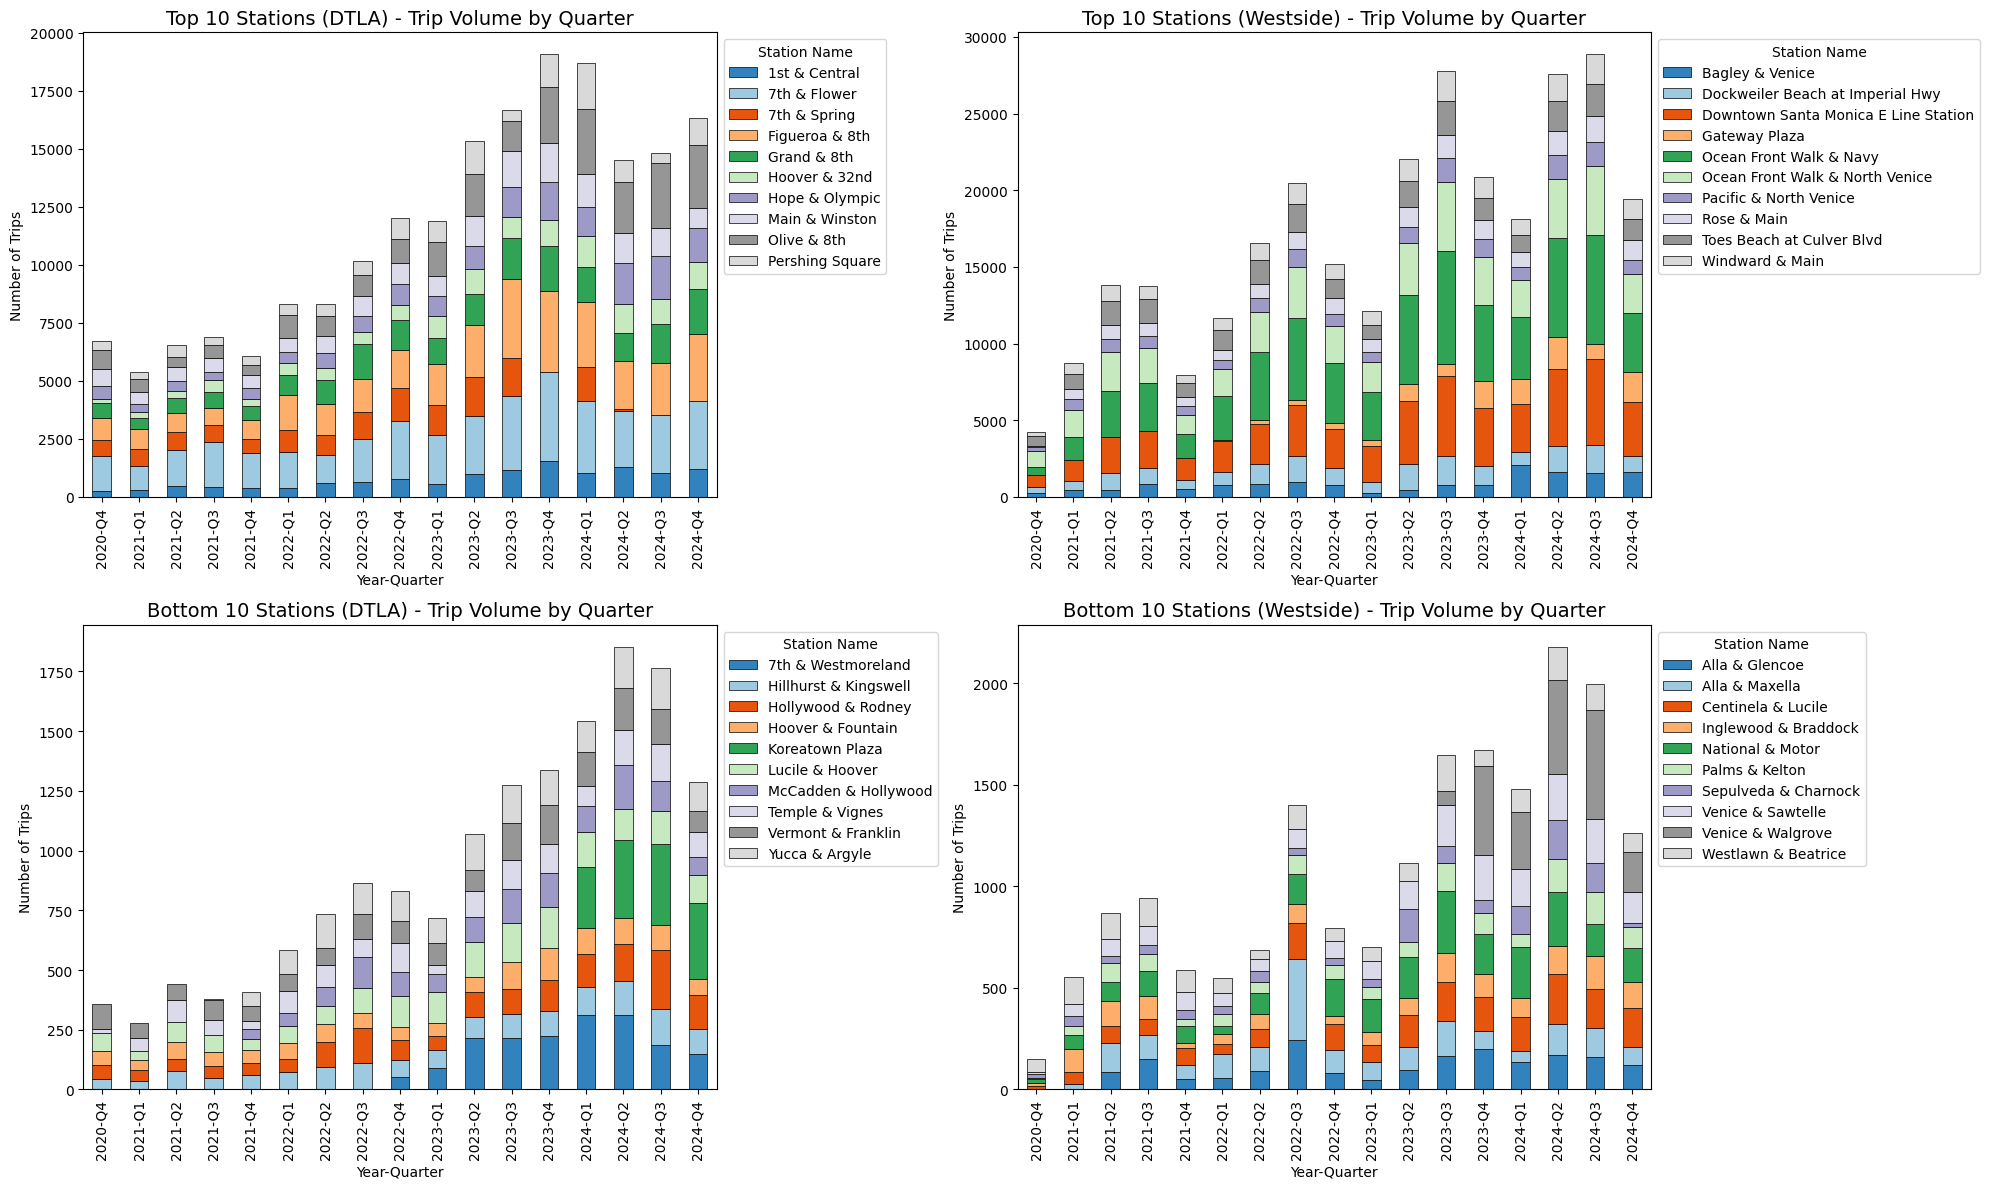

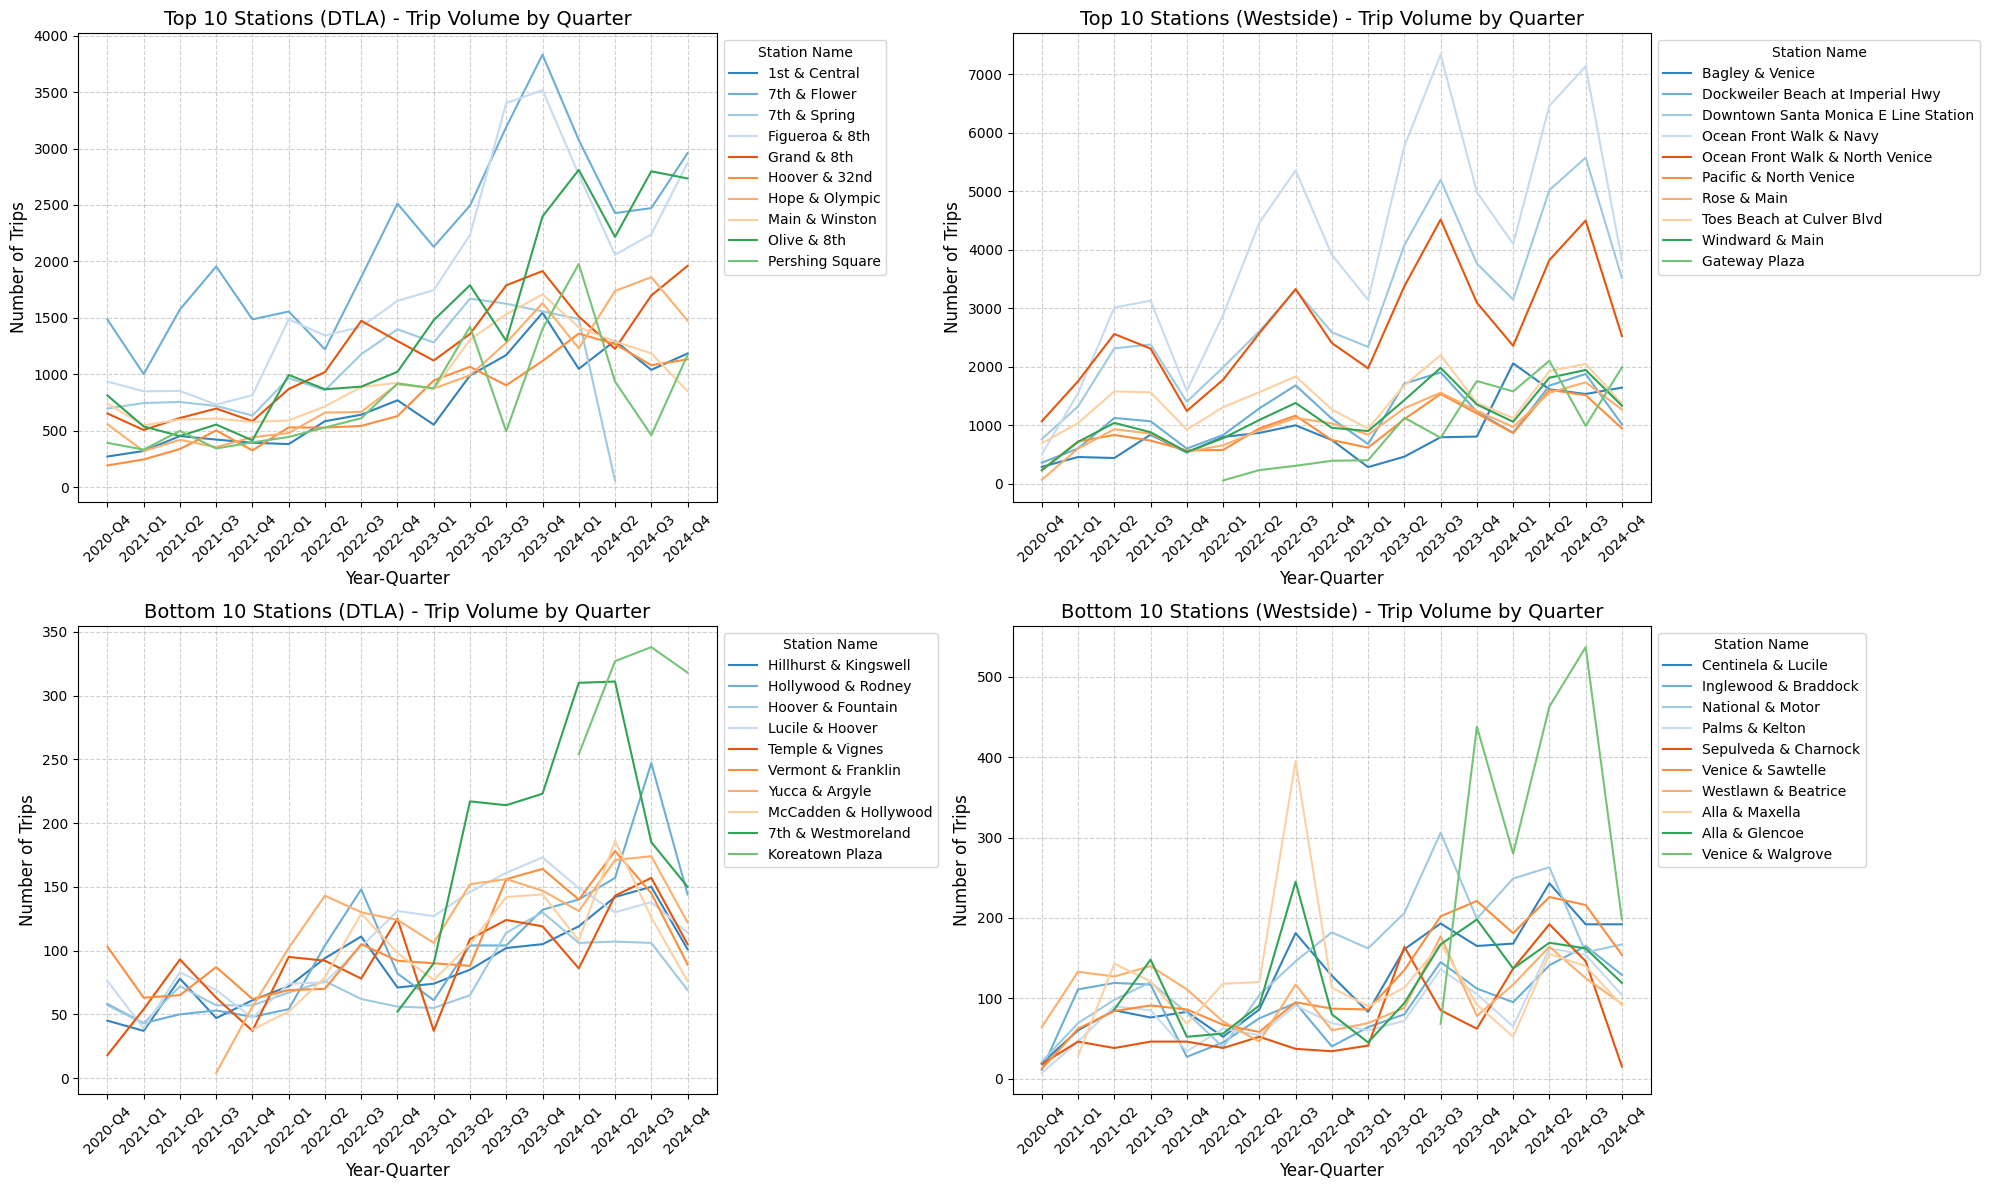

In [786]:
filtered_data = stations[stations['start_station_region'].isin(['DTLA', 'Westside'])]
filtered_data['year'] = filtered_data['start_date'].dt.year
filtered_data['quarter'] = filtered_data['start_date'].dt.quarter
trip_quarterly_counts = (
    filtered_data.groupby(['start_station_name', 'start_station_region', 'year', 'quarter'])['trip_id']
    .count()
    .reset_index()
)
trip_quarterly_counts.columns = ['station_name', 'region', 'year', 'quarter', 'trips']

def filter_stations(data, station_list):
    return data[data['station_name'].isin(station_list)]

trip_quarterly_top_dtla = filter_stations(trip_quarterly_counts, top_stations_dtla)
trip_quarterly_top_westside = filter_stations(trip_quarterly_counts, top_stations_westside)
trip_quarterly_bottom_dtla = filter_stations(trip_quarterly_counts, bottom_stations_dtla)
trip_quarterly_bottom_westside = filter_stations(trip_quarterly_counts, bottom_stations_westside)

def plot_stacked_bars(data, title, ax):
    data = data.copy()
    data['year_quarter'] = data['year'].astype(str) + '-Q' + data['quarter'].astype(str)
    pivot_data = data.pivot(index='year_quarter', columns='station_name', values='trips').fillna(0)

    pivot_data.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        cmap='tab20c',
        edgecolor='black',
        linewidth=0.5,
        
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Year-Quarter')
    ax.set_ylabel('Number of Trips')
    ax.legend(title='Station Name', loc='upper left', bbox_to_anchor=(1, 1))

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plot_stacked_bars(trip_quarterly_top_dtla, 'Top 10 Stations (DTLA) - Trip Volume by Quarter', axes[0, 0])
plot_stacked_bars(trip_quarterly_top_westside, 'Top 10 Stations (Westside) - Trip Volume by Quarter', axes[0, 1])
plot_stacked_bars(trip_quarterly_bottom_dtla, 'Bottom 10 Stations (DTLA) - Trip Volume by Quarter', axes[1, 0])
plot_stacked_bars(trip_quarterly_bottom_westside, 'Bottom 10 Stations (Westside) - Trip Volume by Quarter', axes[1, 1])

plt.tight_layout()
plt.show()

plt.close('all')

def plot_line(data, title, ax):
    data = data.copy()
    data['year_quarter'] = data['year'].astype(str) + '-Q' + data['quarter'].astype(str)
    data = data.sort_values(['year', 'quarter'])

    sns.lineplot(
        data=data,
        x='year_quarter',
        y='trips',
        hue='station_name',
        palette='tab20c',  # Custom color palette from blue to yellow
        linewidth=1.5,  
        ax=ax
    )

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Year-Quarter', fontsize=12)
    ax.set_ylabel('Number of Trips', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  
    ax.legend(title='Station Name', loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True, linestyle='--', alpha=0.6)

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plot_line(trip_quarterly_top_dtla, 'Top 10 Stations (DTLA) - Trip Volume by Quarter', axes[0, 0])
plot_line(trip_quarterly_top_westside, 'Top 10 Stations (Westside) - Trip Volume by Quarter', axes[0, 1])
plot_line(trip_quarterly_bottom_dtla, 'Bottom 10 Stations (DTLA) - Trip Volume by Quarter', axes[1, 0])
plot_line(trip_quarterly_bottom_westside, 'Bottom 10 Stations (Westside) - Trip Volume by Quarter', axes[1, 1])

plt.tight_layout()
plt.show()

---
### Quarterly Trip Analysis of Low-Performing Stations

#### Downtown LA:
- **Koreatown Plaza**, a station with **24 docks**, stands out among Downtown LA's low-performing stations. Despite being a relatively new addition to the network, it shows a steady rise in usage over the quarters, indicating strong potential for growth. The presence of 24 docks suggests that it is strategically placed in an area with anticipated high demand. The increase in trips, especially approaching the warmer months, indicates that this station could experience significant growth during the coming summer, potentially shifting its status from a low-performing station
- Other stations like **Hillhurst & Kingswell** and **Hoover & Fountain** exhibit consistent but modest usage trends, suggesting niche demand from local residents or commuters

#### Westside:
- In the Westside, **Venice & Sawtelle** and **Sepulveda & Charnock** have shown occasional peaks in trip volumes, though they remain low-performing overall. These spikes could be associated with specific seasonal events or recreational activities in the area
- **Alla & Glencoe** and **National & Motor** show more recent increases in usage, indicating that these stations might also be relatively new or benefiting from improved local engagement. They exhibit notable trip volumes compared to other low-performing stations, suggesting potential for further growth

#### Key Insights:
- Some low-performing stations have not been operational for as long as others, which partially explains their lower trip volumes. These stations, particularly **Koreatown Plaza**, display strong upward trends that signal growing adoption
- Seasonal factors and localized events appear to influence spikes in trip volume for certain stations, particularly in recreational areas of the Westside
- Stations with higher dock counts, like Koreatown Plaza, are likely designed to accommodate future demand, and their performance could improve significantly over time

---

## Visualization of Trip Volume over Time

The observed trip distribution over the week and hours of the day directly supports the argument for region-specific planning. Downtown stations may benefit from incentives targeting workday commuters, while the Westside can explore promotions aimed at weekend and recreational users.

For this a visualization map is created, using trip volume over time.

---

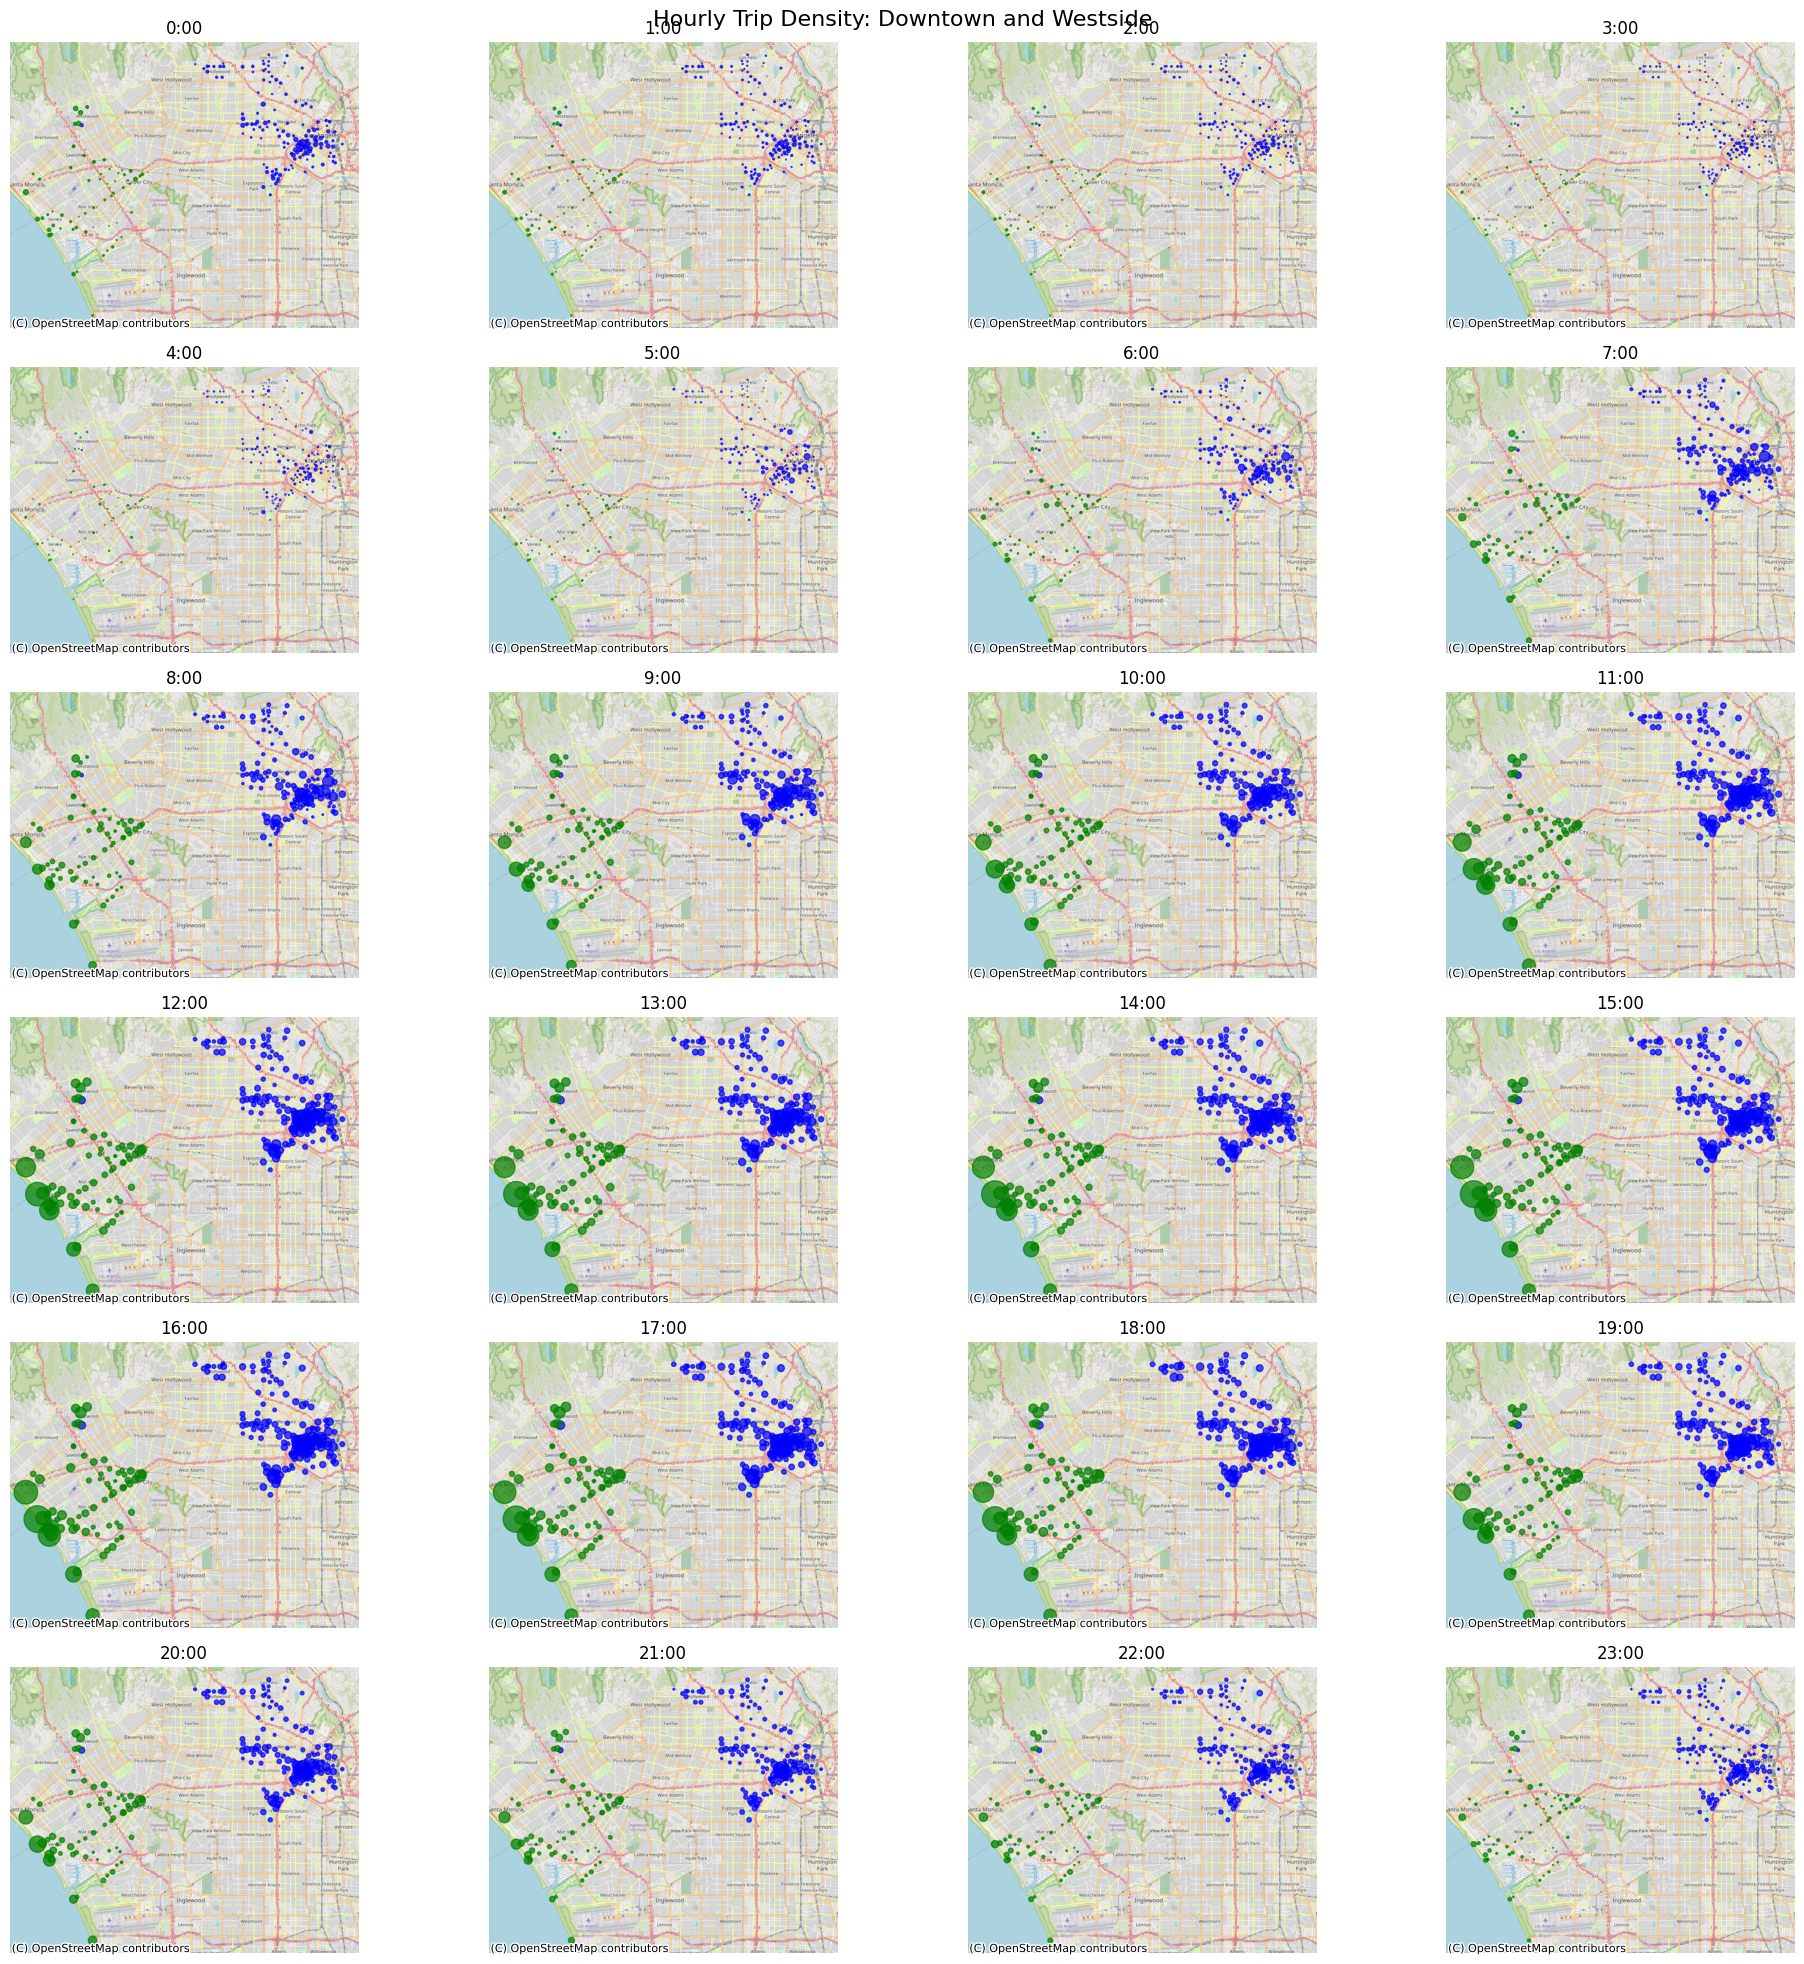

In [790]:
stations['hour'] = pd.to_datetime(stations['start_time_new'], format='%H:%M:%S', errors='coerce').dt.hour
stations['formatted_hour'] = stations['hour'].apply(lambda x: f"{x:02}:00" if pd.notnull(x) else "NaN")
downtown_data = stations[stations['start_station_region'] == 'DTLA'].dropna(subset=['start_lat', 'start_lon'])
downtown_hourly_trips = downtown_data.groupby(['hour', 'start_station_name', 'start_lat', 'start_lon'])['trip_id'].count().reset_index()
downtown_hourly_trips.columns = ['hour', 'station_name', 'lat', 'lon', 'total_trips']
downtown_hourly_trips['region'] = 'Downtown'
westside_data = stations[stations['start_station_region'] == 'Westside'].dropna(subset=['start_lat', 'start_lon'])
westside_hourly_trips = westside_data.groupby(['hour', 'start_station_name', 'start_lat', 'start_lon'])['trip_id'].count().reset_index()
westside_hourly_trips.columns = ['hour', 'station_name', 'lat', 'lon', 'total_trips']
westside_hourly_trips['region'] = 'Westside'
combined_hourly_trips = pd.concat([downtown_hourly_trips, westside_hourly_trips], ignore_index=True)

combined_hourly_trips_gdf = gpd.GeoDataFrame(
    combined_hourly_trips, 
    geometry=[Point(xy) for xy in zip(combined_hourly_trips['lon'], combined_hourly_trips['lat'])],
    crs="EPSG:4326"
)

# Reproject to Web Mercator for basemap compatibility
combined_hourly_trips_gdf = combined_hourly_trips_gdf.to_crs(epsg=3857)

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))  # Adjust rows/columns for 24 hours
axes = axes.flatten()

for hour in range(24):
    ax = axes[hour]
    hourly_data = combined_hourly_trips_gdf[combined_hourly_trips_gdf['hour'] == hour]
    
    if not hourly_data.empty:
        downtown_hourly = hourly_data[hourly_data['region'] == 'Downtown']
        downtown_hourly.plot(
            ax=ax,
            markersize=downtown_hourly['total_trips'] * 0.05,
            color='blue',
            alpha=0.7,
            label='Downtown'
        )
        
        westside_hourly = hourly_data[hourly_data['region'] == 'Westside']
        westside_hourly.plot(
            ax=ax,
            markersize=westside_hourly['total_trips'] * 0.05,
            color='green',
            alpha=0.7,
            label='Westside'
        )
    
    # Add basemap
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)
    ax.set_title(f"{hour}:00", fontsize=12)
    ax.set_axis_off()

plt.suptitle("Hourly Trip Density: Downtown and Westside", fontsize=16)
plt.tight_layout()
plt.show()



---
### Timeline of Demand: Heatmap

To viualize the trend pattern of the station usage two seperate heatmaps are created highlighting daily and hourly use.

---

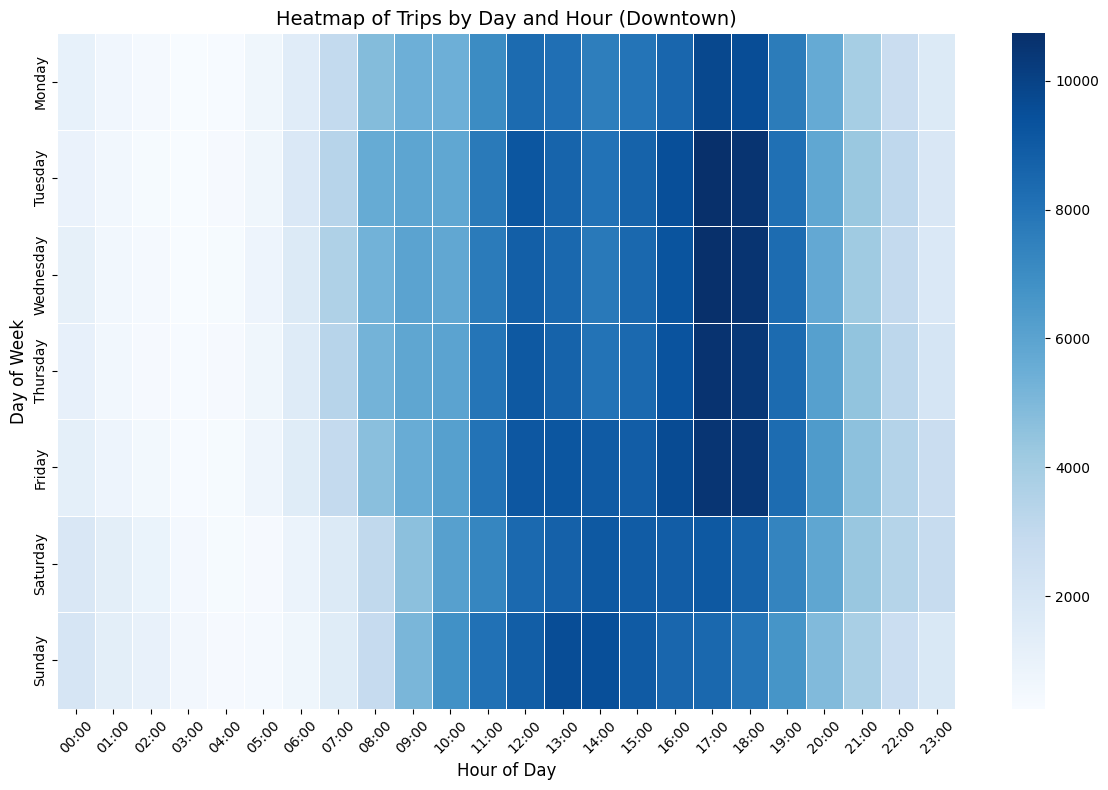

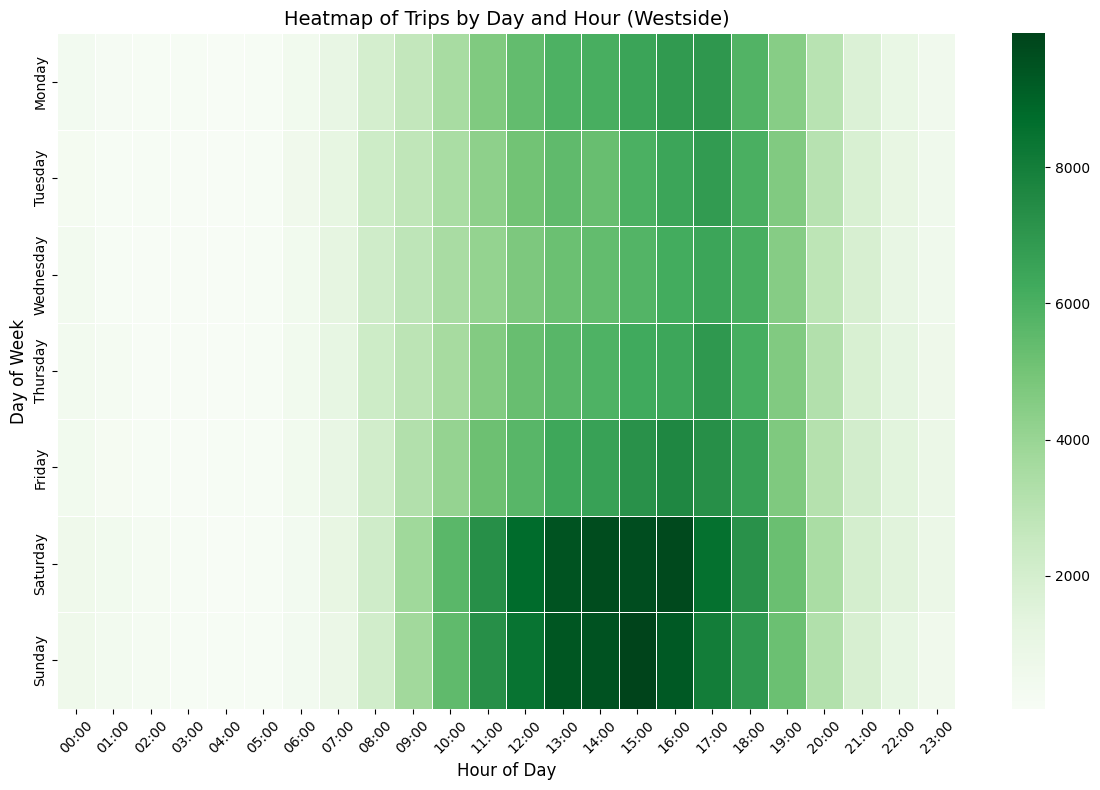

In [793]:
stations['hour'] = pd.to_datetime(stations['start_time_new'], format='%H:%M:%S', errors='coerce').dt.hour
stations['formatted_hour'] = stations['hour'].apply(lambda x: f"{x:02}:00" if pd.notnull(x) else "NaN")
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

downtown_data = stations[stations['start_station_region'] == 'DTLA']
downtown_heatmap_data = (
    downtown_data.groupby(['day_name', 'formatted_hour']).size()
    .unstack(fill_value=0)
    .reindex(day_order)
)

plt.figure(figsize=(12, 8))
sns.heatmap(downtown_heatmap_data, cmap='Blues', annot=False, fmt='d', linewidths=.5)
plt.title('Heatmap of Trips by Day and Hour (Downtown)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

westside_data = stations[stations['start_station_region'] == 'Westside']
westside_heatmap_data = (
    westside_data.groupby(['day_name', 'formatted_hour']).size()
    .unstack(fill_value=0)
    .reindex(day_order)
)

plt.figure(figsize=(12, 8))
sns.heatmap(westside_heatmap_data, cmap='Greens', annot=False, fmt='d', linewidths=.5)
plt.title('Heatmap of Trips by Day and Hour (Westside)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Downtown LA Heatmap Insights:

Peak Hours: Downtown LA demonstrates a clear surge in activity during weekdays, especially between 12:00 PM and 6:00 PM, with a secondary rise during the morning commute hours (8:00 AM - 10:00 AM). This reflects the region's nature as a business hub with a high volume of trips catering to office workers and lunchtime commuters.
Weekday Focus: The prominence of weekday trips aligns with Downtown's profile as a commuter-heavy region. This matches earlier observations about stations like 7th & Flower and Pershing Square, which showed high trip volumes predominantly tied to workday commuting.

## Westside Heatmap Insights:

Spread Across the Day: The Westside exhibits more consistent activity throughout the day, with a broad peak extending from 10:00 AM to 7:00 PM. This reflects the leisure-oriented nature of the Westside, where users may be engaging in recreational activities or using the bike-share system for short, flexible trips.
Weekend Prominence: Unlike Downtown LA, the Westside sees higher relative activity on weekends, indicative of its appeal as a tourist and leisure destination. Earlier findings about the popularity of stations like Ocean Front Walk & Navy and Toes Beach at Culver Blvd underscore this observation.

# Conclusion & Further Steps

The analysis of Downtown LA and the Westside regions has provided critical insights into user behavior, station performance, and temporal trip patterns. Downtown LA, characterized by weekday commuting patterns and concentrated activity during office hours, highlights the need to optimize stations for high-demand workday usage. In contrast, the Westside’s balanced activity throughout the day and strong weekend usage reflects its appeal as a recreational and leisure destination. Observations such as the potential growth of Koreatown Plaza and the steady trip increases at low-performing stations suggest that station performance is often influenced by external factors like dock availability, recent openings, and passholder types.

To move forward with feature engineering, it is essential to compute key metrics that can enhance the predictive modeling process. First, calculating the total trips per station and identifying the most popular routes will help capture spatial and behavioral patterns. 

Proximity analysis to metro and bus stations can uncover intermodal connectivity impacts on station usage. Incorporating seasonal components, such as monthly rainfall, will account for environmental influences on trip volumes.

Additionally, calculating distances between stations can provide insights into network connectivity and the role of nearby stations in overall performance. Metrics like average trip duration, passholder type distribution, and regional trends should also be incorporated to enrich the dataset further. These steps will ensure a comprehensive feature set that reflects both spatial and temporal dynamics, setting the stage for robust predictive modeling.

By analyzing these regions separately, we can better account for the contextual factors influencing user behavior and station performance. This segmentation allows for targeted feature engineering, such as incorporating different temporal trends, proximity metrics, and regional influences unique to each area. It ensures that predictive models accurately capture the nuances of user demand in these distinct regions.
